<a href="https://colab.research.google.com/github/Dahernandezsilve/HT1MD/blob/main/HT_1_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 29/01/2024        

Grupo 6 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Daniel Armando Valdez Reyes 21240

## HDT3 - House Prices
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*train.csv*. A continuación se muestran los resultados: 

*Primero se importan todas la librerías requeridas para llevar a cabo el análisis*

In [68]:
import pandas as pd
from scipy.stats import shapiro, ks_2samp, anderson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import *
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

Se lleva a cabo un análisis identificando los tipos de variables involucradas:
## Descripcion de variables
- MSSubClass: Cuantitativa Discreta
- MSZoning: Cualitativa Categorica	
- LotFrontage: Cuantitativa Medible
- LotArea: Cuantitativa Medible
- Street: Cualitativa Categorica
- Alley: Cualitativa Categorica
- LotShape: Cualitativa Categorica       
- LandContour: Cualitativa Categorica
- Utilities: Cualitativa Categorica		
- LotConfig: Cualitativa Categorica
- LandSlope: Cualitativa Categorica 
- Neighborhood: Cualitativa Categorica
- Condition1: Cualitativa Categorica
- Condition2: Cualitativa Categorica
- BldgType: Cualitativa Categorica
- HouseStyle: Cualitativa Categorica 
- OverallQual: Cuantitativa Discreta
- OverallCond: Cuantitativa Discreta
- YearBuilt: Cuantitativa Discreta
- YearRemodAdd: Cuantitativa Discreta
- RoofStyle: Cualitativa Categorica
- RoofMatl: Cualitativa Categorica
- Exterior1st: Cualitativa Categorica
- Exterior2nd: Cualitativa Categorica
- MasVnrType: Cualitativa Categorica
- MasVnrArea: Cuantitativa Continua
- ExterQual: Cualitativa Categorica 
- ExterCond: Cualitativa Categorica
- Foundation: Cualitativa Categorica
- BsmtQual: Cualitativa Ordinal
- BsmtCond: Cualitativa Categorica
- BsmtExposure: Cualitativa Categorica 
- BsmtFinType1: Cualitativa Categorica
- BsmtFinSF1: Cuantitativa Continua
- BsmtFinType2: Cualitativa Categorica
- BsmtFinSF2: Cuantitativa Continua
- BsmtUnfSF: Cuantitativa Continua
- TotalBsmtSF: Cuantitativa Continua
- Heating: Cualitativa Categorica
- HeatingQC: Cualitativa Categoriica
- CentralAir: Cualitativa Categorica
- Electrical: Cualitativa Categorica
- 1stFlrSF: Cuantitativa Continua
- 2ndFlrSF: Cuantitativa Continua
- LowQualFinSF: Cuantitativa Continua
- GrLivArea: Cuantitativa Continua
- BsmtFullBath: Cuantitativa Discreta
- BsmtHalfBath: Cuantitativa Discreta
- FullBath: Cuantitativa Discreta
- HalfBath: Cuantitativa Discreta
- Bedroom: Cuantitativa Discreta
- Kitchen: Kitchens above grade
- KitchenQual: Cualitativa Categorica
- TotRmsAbvGrd: Cuantitativa Discreta
- Functional: Cualitativa Categorica
- Fireplaces: Cuantitativa Discreta
- FireplaceQu: Cualitativa Categorica
- GarageType: Cualitativa Categorica		
- GarageYrBlt: Cuantitativa Discreta
- GarageFinish: Cualitativa Categorica
- GarageCars: Cuantitativa Discreta
- GarageArea: Cuantitativa Continua
- GarageQual: Cualitativa Categorica
- GarageCond: Cualitativa Categorica 
- PavedDrive: Cualitativa Categorica
- WoodDeckSF: Cuantitativa Continua
- OpenPorchSF: Cuantitativa Continua
- EnclosedPorch: Cuantitativa Continua
- 3SsnPorch: TCuantitativa Continua
- ScreenPorch: Cuantitativa Continua
- PoolArea: Cuantitativa Continua
- PoolQC: Cualitativa Categorica
- Fence: Cualitativa Categorica
- MiscFeature: Cualitativa Categorica
- MiscVal: Cuantitativa Discreta
- MoSold: Cuantitativa Discreta
- YrSold: Cuantitativa Discreta
- SaleType: Cualitativa Categorica
- SaleCondition: Cualitativa Categorica

*Antes de llevar a cabo el análisis se realiza una carga de los datos y se realizá una serie de preprocesamientos para que la información sea útil para el análisis como llenar con 0s o realizar las conversiones debidas a elementos tipo *NaN***

In [69]:
dataframe: pd.DataFrame = pd.read_csv("train.csv",  encoding='ISO-8859-1')

dataframe.columns
dataframe['PoolQC'] = dataframe['PoolQC'].fillna(0) # Se rellenan con 0 los na de PoolQC
dataframe['MasVnrType'] = dataframe['MasVnrType'].fillna('None') # Se rellenan con 'None' los na 'MasVnrType'
dataframe['FireplaceQu'] = dataframe['MasVnrType'].fillna('NA')
dataframe['Fence'] = dataframe['Fence'].fillna('NA')
dataframe['MiscFeature'] = dataframe['MiscFeature'].fillna('NA')
dataframe['LotFrontage'] = dataframe['LotFrontage'].fillna(0)
dataframe['Alley'] = dataframe['Alley'].fillna('NA')
#dataframe['GarageYrBlt'] = dataframe['GarageYrBlt'].fillna(dataframe['GarageYrBlt'].mean())
#dataframe['MasVnrArea'] = dataframe['MasVnrArea'].fillna(dataframe['MasVnrArea'].mean())

dataframe.drop(['Id'], axis=1, inplace=True) #Se elimina la columna Id

infoSumary = dataframe.info() #Mostrar información del tipo de variables utilizadas

#Extraccion de las columnas a utilizar para las pruebas de clustering y regresion lineal
df = dataframe
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave    NA      Reg   
1             20       RL         80.0     9600   Pave    NA      Reg   
2             60       RL         68.0    11250   Pave    NA      IR1   
3             70       RL         60.0     9550   Pave    NA      IR1   
4             60       RL         84.0    14260   Pave    NA      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave    NA      Reg   
1456          20       RL         85.0    13175   Pave    NA      Reg   
1457          70       RL         66.0     9042   Pave    NA      Reg   
1458          20       RL         68.0     9717   Pave    NA      Reg   
1459          20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0      0     NA          NA   
1            Lvl    AllPub       FR2  ...        0      0     NA          NA   
2            Lvl    AllPub    Inside  ...        0      0     NA          NA   
3            Lvl    AllPub    Corner  ...        0      0     NA          NA   
4            Lvl    AllPub       FR2  ...        0      0     NA          NA   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0      0     NA          NA   
1456         Lvl    AllPub    Inside  ...        0      0  MnPrv          NA   
1457         Lvl    AllPub    Inside  ...        0      0  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0      0     NA          NA   
1459         Lvl    AllPub    Inside  ...        0      0     NA          NA   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

Dentro del preprocesamiento de datos se convirtieron algunas variables cualitativas a su versión cuantitativas que se consideraron que pueden ser útiles para el análisis exploratorio, el clustering y la predicción de valores mediante regresiones lineales.  

In [70]:
def change(variable):
    dictValue = {'NA': 0}
    count = 1

    def changeToVariable(x):
        nonlocal count  # Para indicar que count es una variable no local
        if x in dictValue:
            return dictValue[x]
        else:
            dictValue[x] = count
            count += 1
            return dictValue[x]
        
    if not pd.api.types.is_numeric_dtype(dataframe[variable]):
        df[variable] = dataframe[variable].apply(changeToVariable)
    
        print(f'Para la variable {variable} los valores ahora son: ')
        for key, value in dictValue.items():
            print(key, ":", value)
    else:
        print(f"La columna {variable} es numerica")

variables = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'OverallCond', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'
]

for variable in variables:
    change(variable=variable)

La columna MSSubClass es numerica
Para la variable MSZoning los valores ahora son: 
NA : 0
RL : 1
RM : 2
C (all) : 3
FV : 4
RH : 5
Para la variable Street los valores ahora son: 
NA : 0
Pave : 1
Grvl : 2
Para la variable Alley los valores ahora son: 
NA : 0
Grvl : 1
Pave : 2
Para la variable LotShape los valores ahora son: 
NA : 0
Reg : 1
IR1 : 2
IR2 : 3
IR3 : 4
Para la variable LandContour los valores ahora son: 
NA : 0
Lvl : 1
Bnk : 2
Low : 3
HLS : 4
Para la variable Utilities los valores ahora son: 
NA : 0
AllPub : 1
NoSeWa : 2
Para la variable LotConfig los valores ahora son: 
NA : 0
Inside : 1
FR2 : 2
Corner : 3
CulDSac : 4
FR3 : 5
Para la variable LandSlope los valores ahora son: 
NA : 0
Gtl : 1
Mod : 2
Sev : 3
Para la variable Neighborhood los valores ahora son: 
NA : 0
CollgCr : 1
Veenker : 2
Crawfor : 3
NoRidge : 4
Mitchel : 5
Somerst : 6
NWAmes : 7
OldTown : 8
BrkSide : 9
Sawyer : 10
NridgHt : 11
NAmes : 12
SawyerW : 13
IDOTRR : 14
MeadowV : 15
Edwards : 16
Timber : 17
Gilber

In [71]:
print('Se determina que el tamaño del dataframe con el que se está trabajando es de',len(dataframe),'datos (filas) incluyendo los encabezados de la tabla.')

Se determina que el tamaño del dataframe con el que se está trabajando es de 1460 datos (filas) incluyendo los encabezados de la tabla.


En este estudio, se decidió como convención realizar transformaciones de datos únicamente a aquellas columnas que cuentan con una cantidad de valores *NaN* mayor a 50. Con este margen, únicamente dos columnas no fueron transformadas:

In [72]:
# Extrae la información relevante del resumen
info_data = {'Columna': [], 'Non-Null Count': [], 'Dtype': []}

for col in dataframe.columns:
    info_data['Columna'].append(col)
    info_data['Non-Null Count'].append(dataframe[col].count())
    info_data['Dtype'].append(dataframe[col].dtype)

# Crea un nuevo DataFrame a partir de la información extraída
info_df = pd.DataFrame(info_data)

info_df[info_df['Non-Null Count']<1460]


Columna  Non-Null Count    Dtype
25    MasVnrArea            1452  float64
30      BsmtCond            1423   object
34  BsmtFinType2            1422   object
58   GarageYrBlt            1379  float64

Se retiran las filas que contengan *NaN* en la columna de respuesta **SalePrice** debido a que es la variable principal que se está estudiando.

In [73]:
dataframe['SalePrice'] =dataframe['SalePrice'].dropna()
dataframe['SalePrice']


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Posteriormente, se procedió a realizar un análisis estadístico de normalidad y comparación de distribuciones para las columnas númericas en el dataframe preprocesado, aplicando pruebas de Shapiro-Wilk y Anderson-Darling. A manera de contar con un análisis detallado de los procedimientos realizados, se imprimen todos los cálculos y se muestran en gráficas. Son una extensa cantidad de datos, por lo que leugo de estos resultados y gráficas, se muestran los resultados relevantes.

Columna MSSubClass: Estadística=0.8046, p-valor=0.0000
La columna MSSubClass no sigue una distribución normal.
Columna MSZoning: Estadística=0.4803, p-valor=0.0000
La columna MSZoning no sigue una distribución normal.
Columna LotFrontage: Estadística=0.9006, p-valor=0.0000
La columna LotFrontage no sigue una distribución normal.
Columna LotArea: Estadística=0.3511, p-valor=0.0000
La columna LotArea no sigue una distribución normal.
Columna Street: Estadística=0.0362, p-valor=0.0000
La columna Street no sigue una distribución normal.
Columna Alley: Estadística=0.2529, p-valor=0.0000
La columna Alley no sigue una distribución normal.
Columna LotShape: Estadística=0.6593, p-valor=0.0000
La columna LotShape no sigue una distribución normal.
Columna LandContour: Estadística=0.3348, p-valor=0.0000
La columna LandContour no sigue una distribución normal.
Columna Utilities: Estadística=0.0087, p-valor=0.0000
La columna Utilities no sigue una distribución normal.
Columna LotConfig: Estadística=

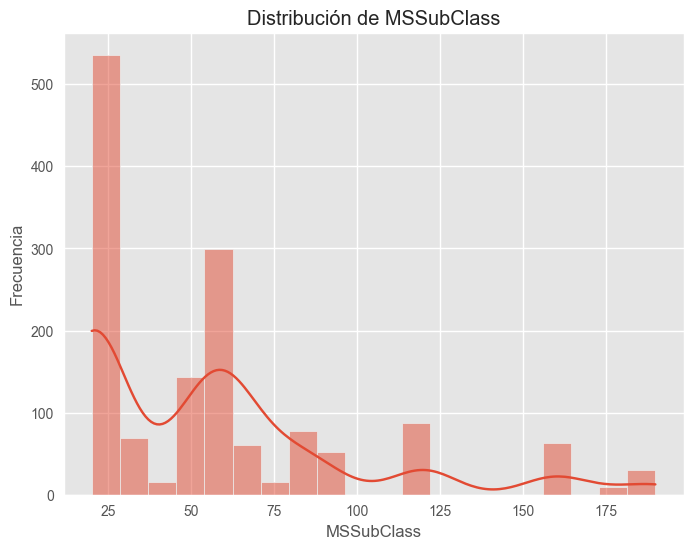

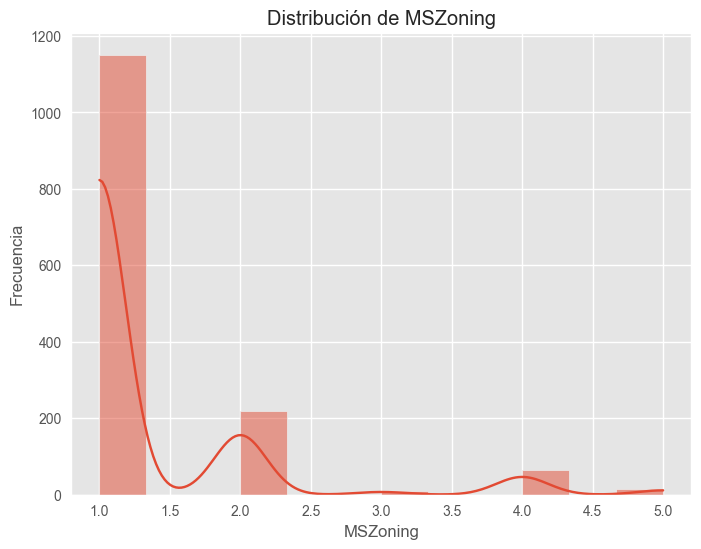

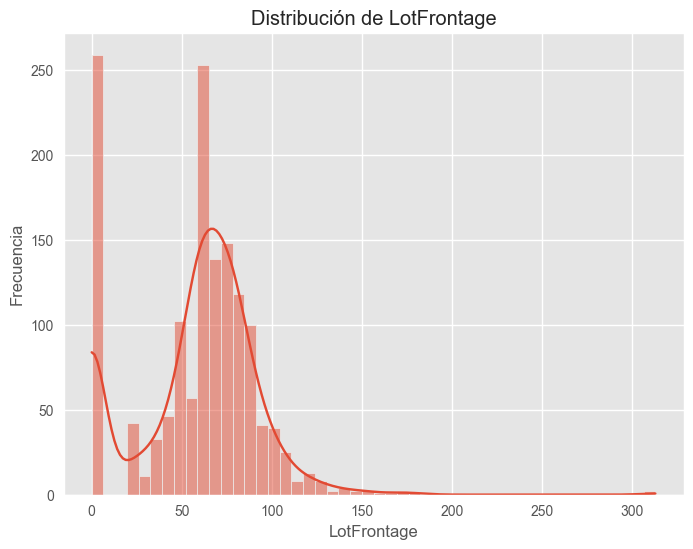

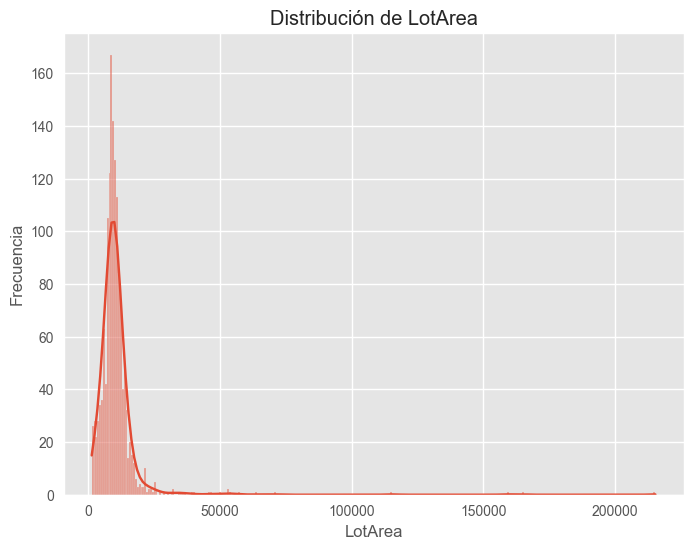

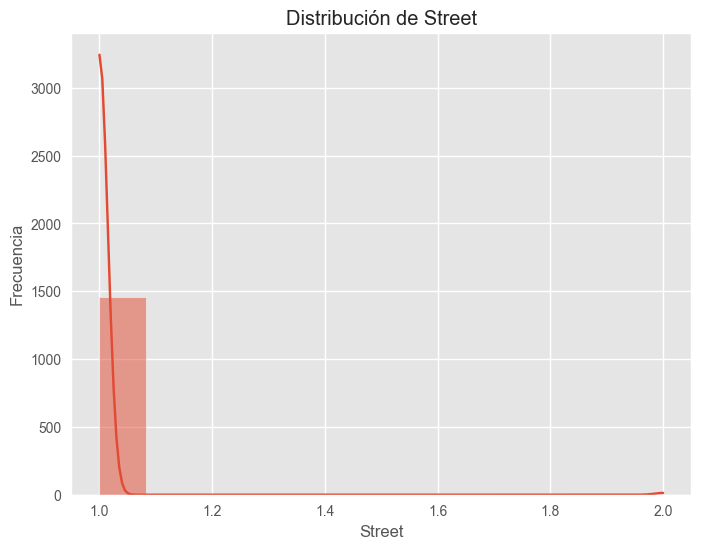

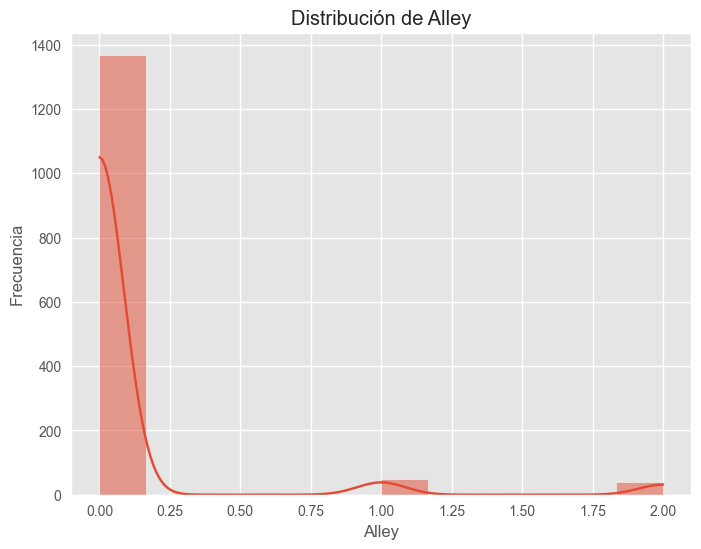

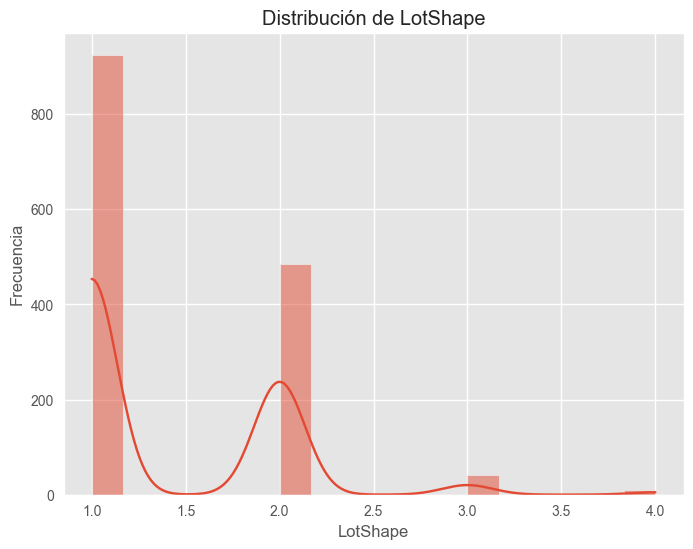

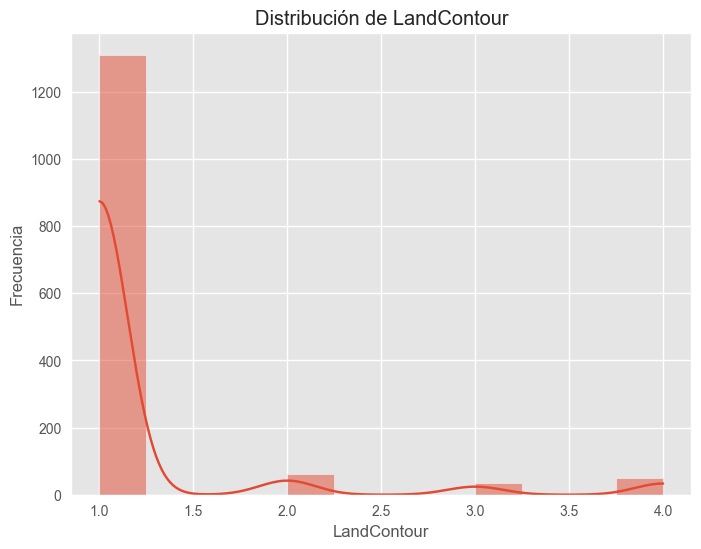

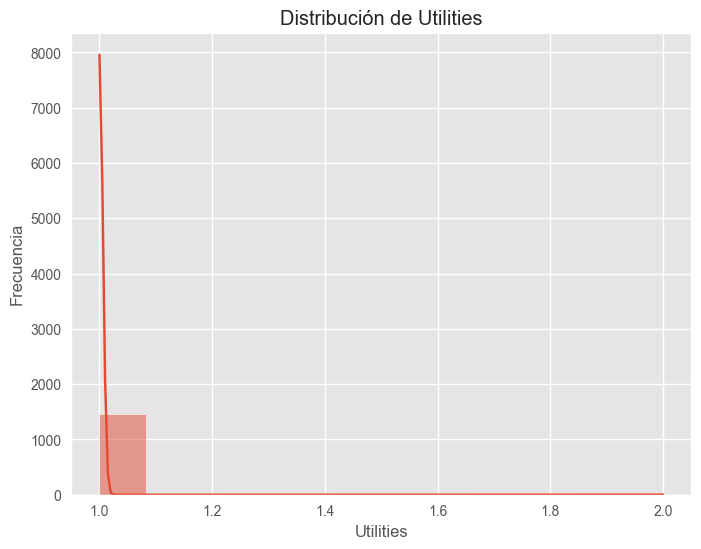

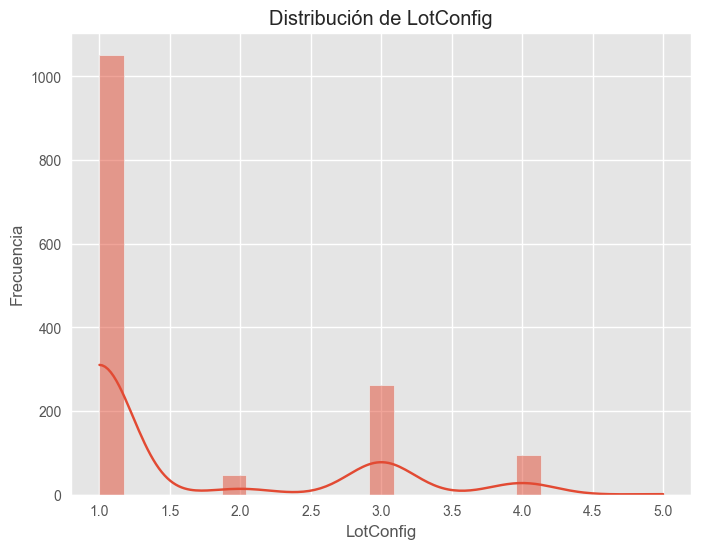

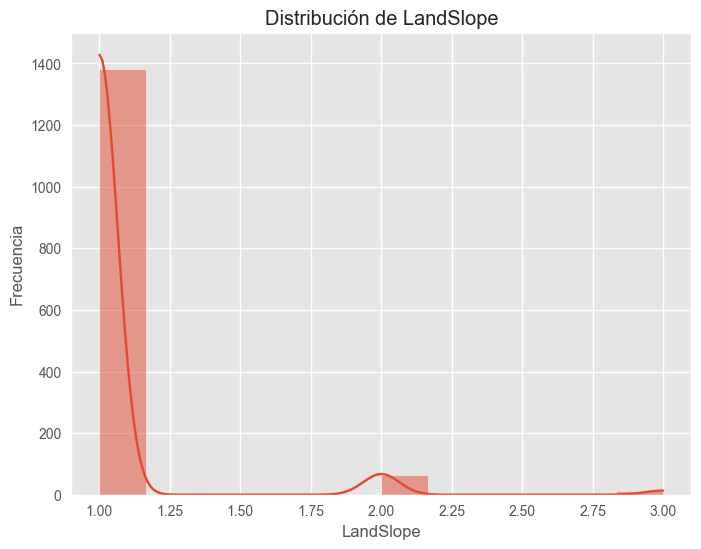

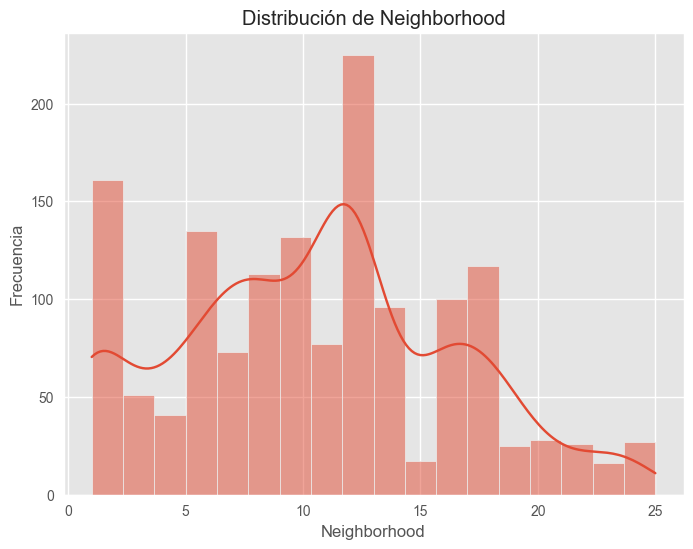

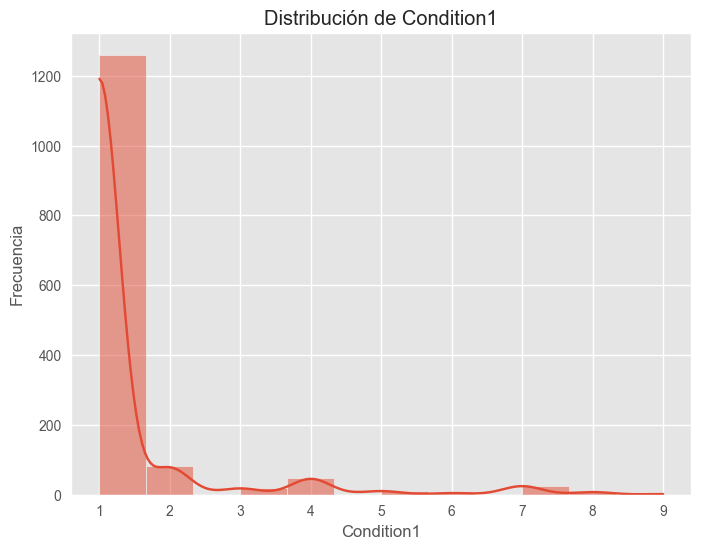

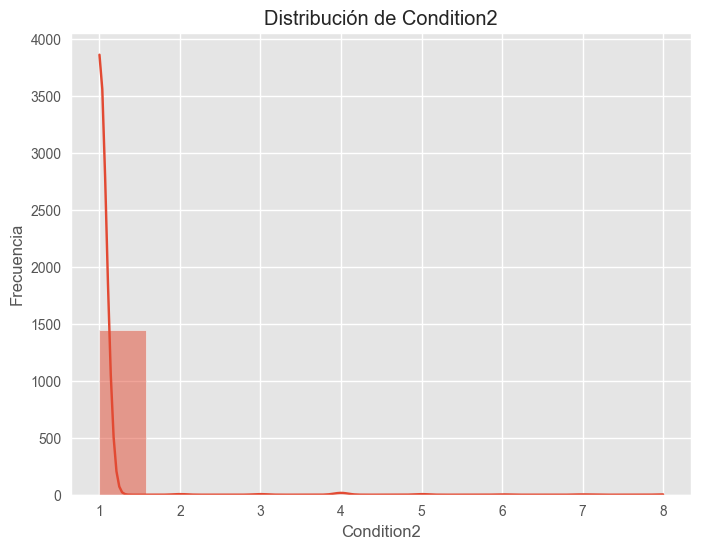

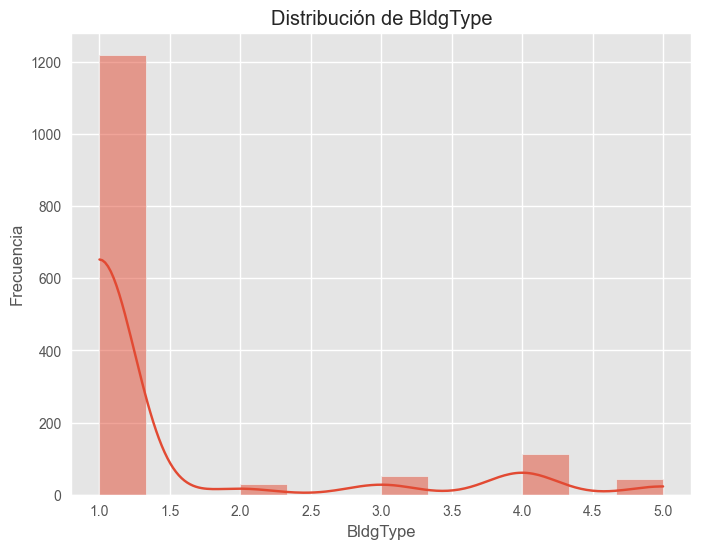

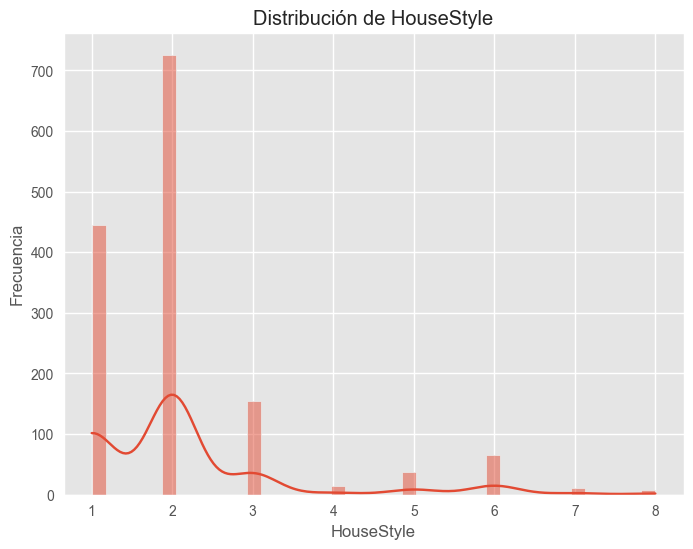

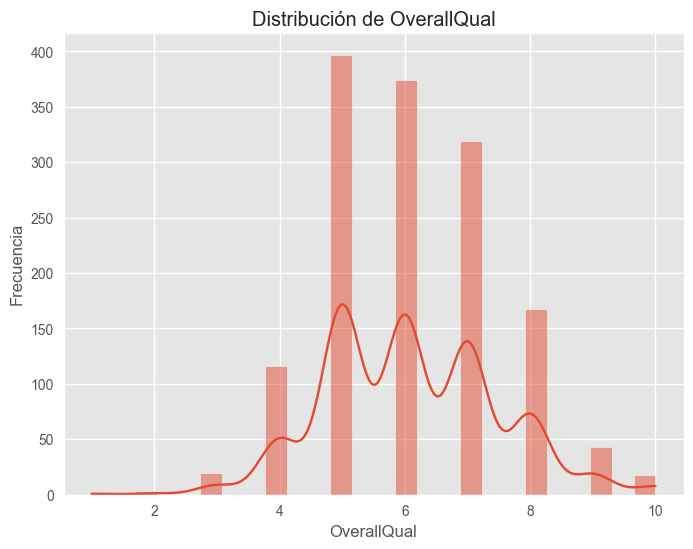

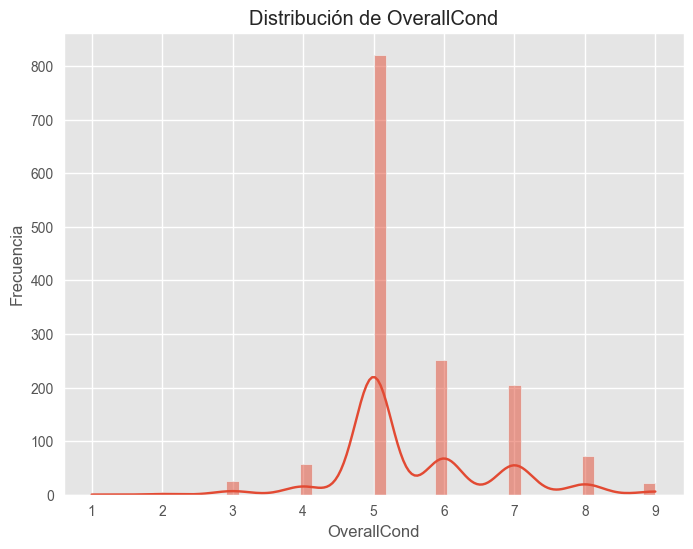

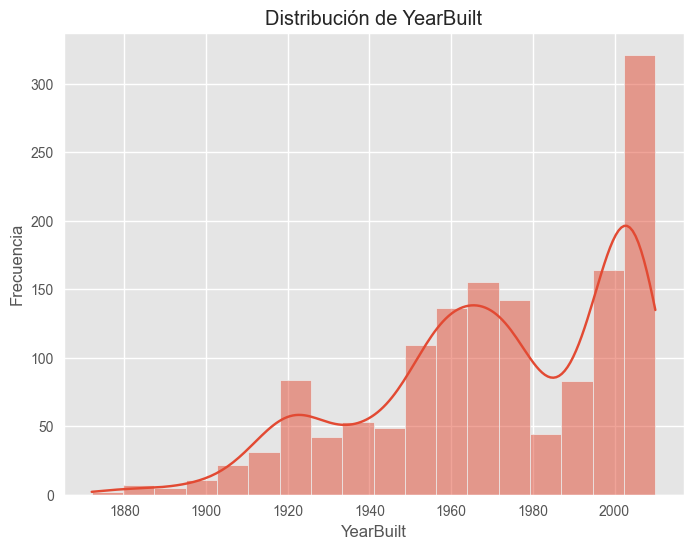

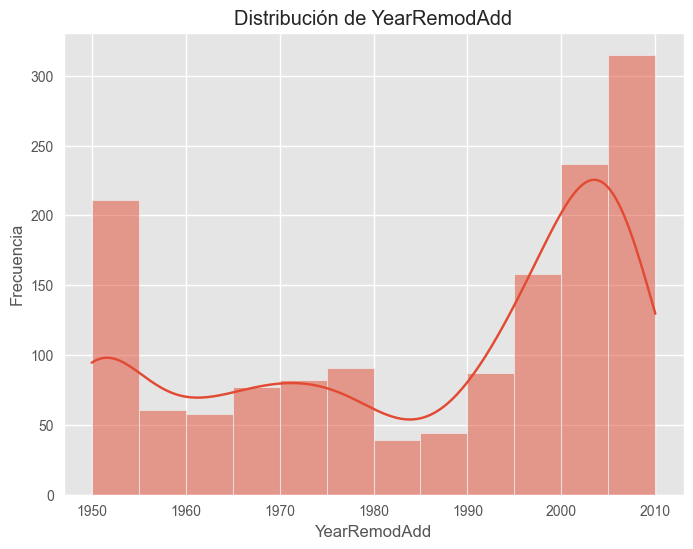

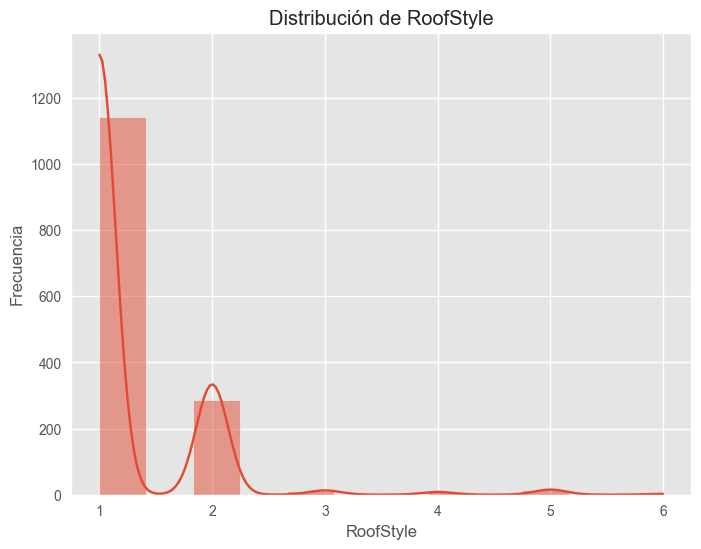

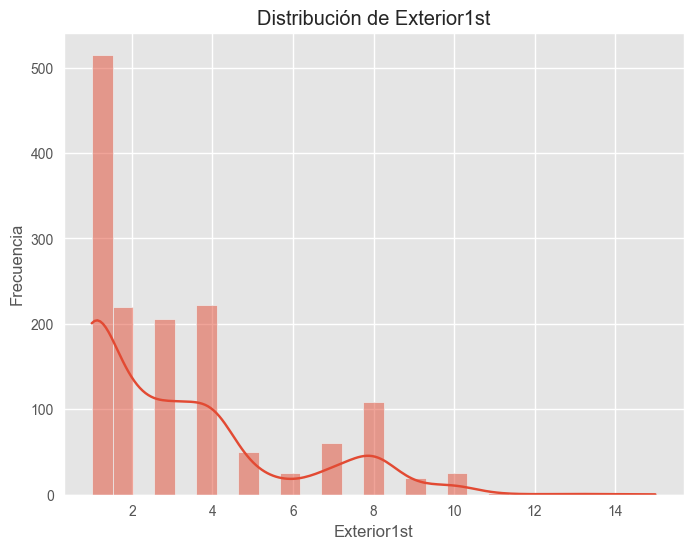

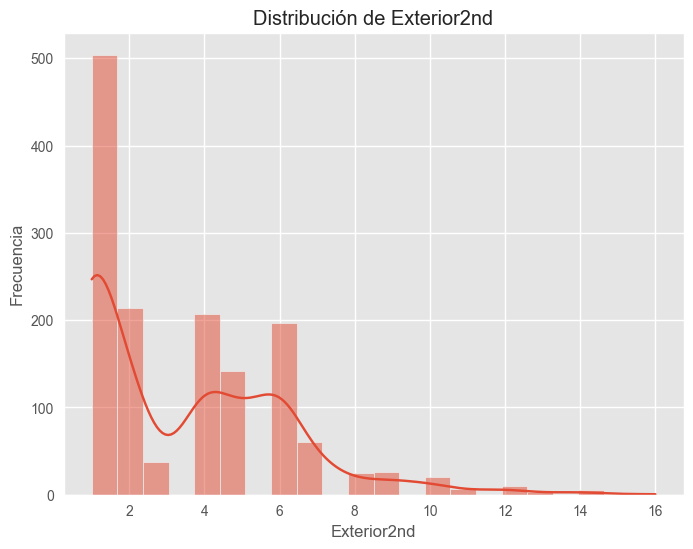

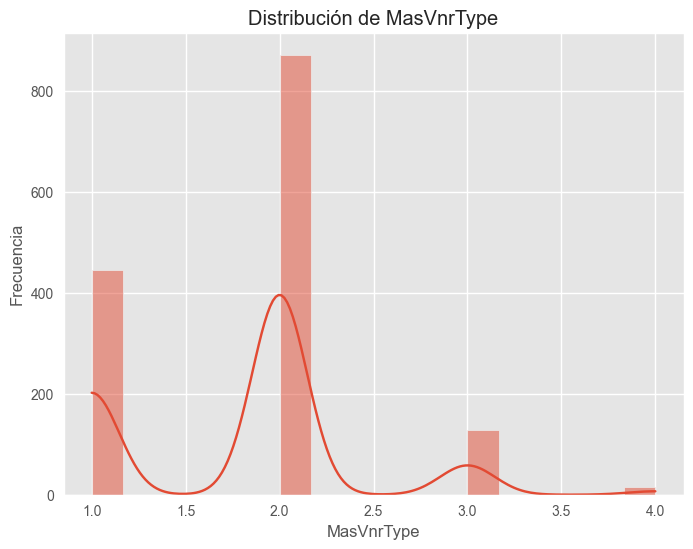

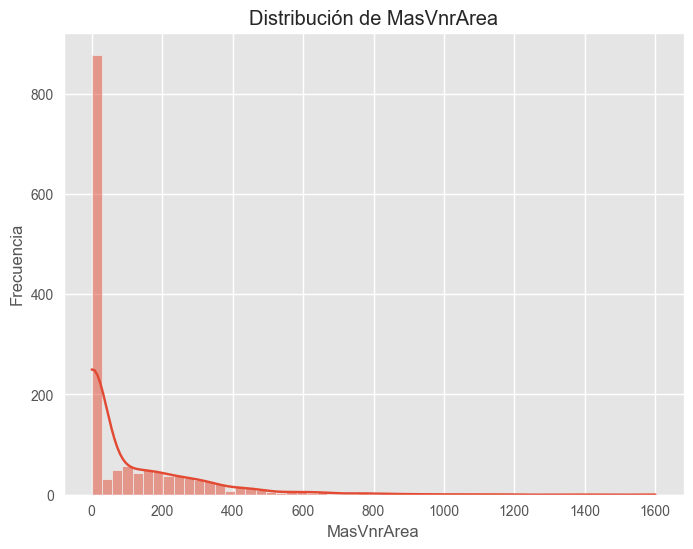

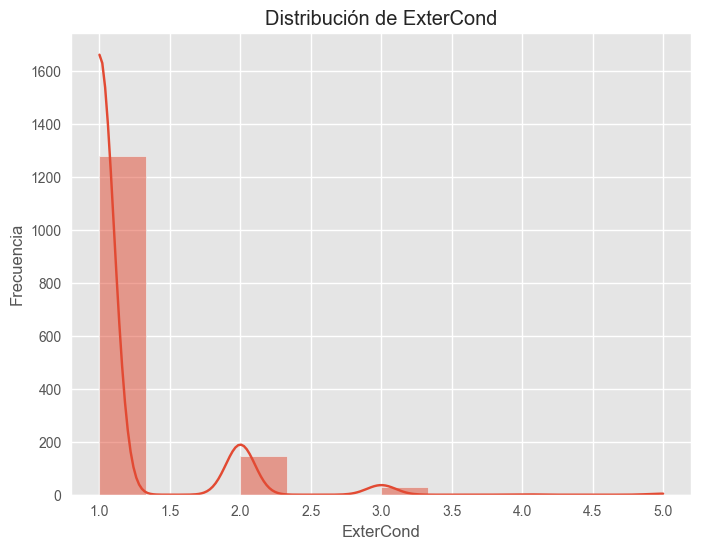

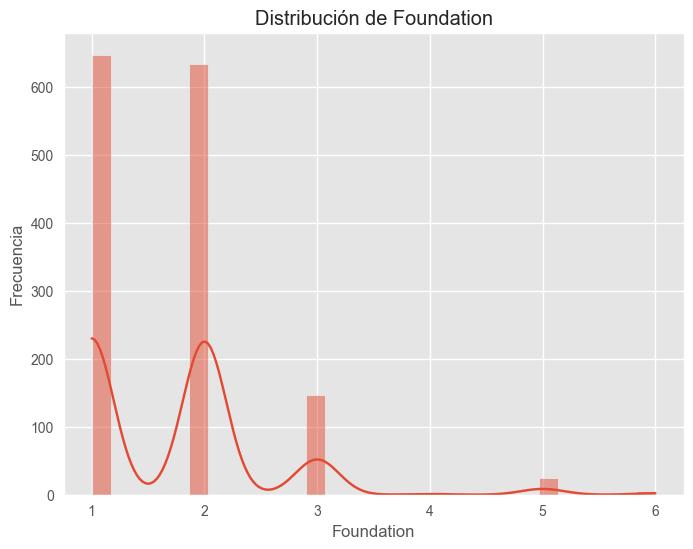

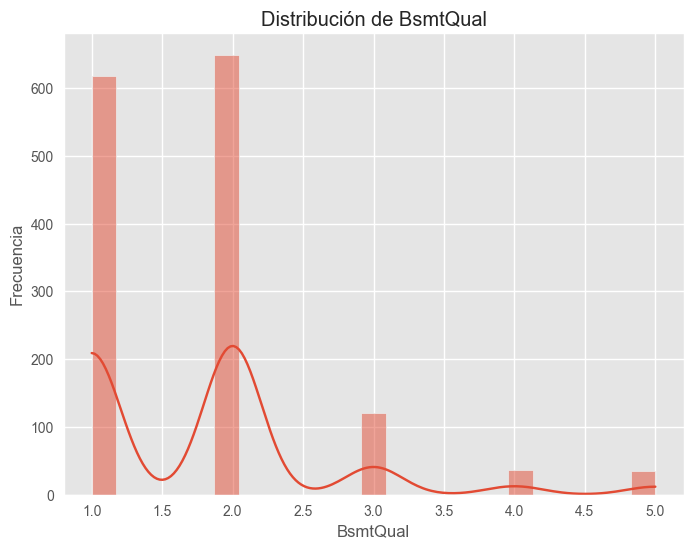

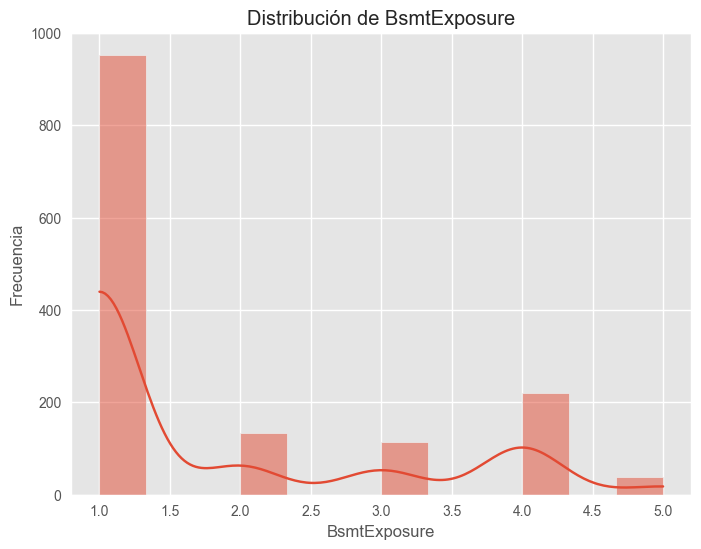

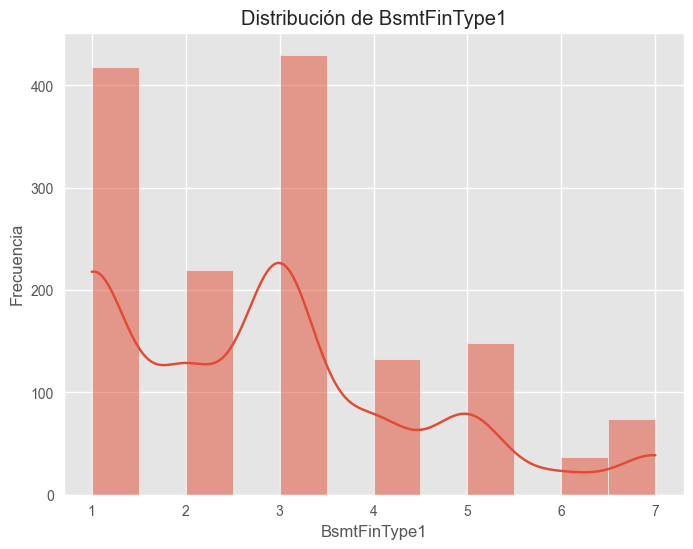

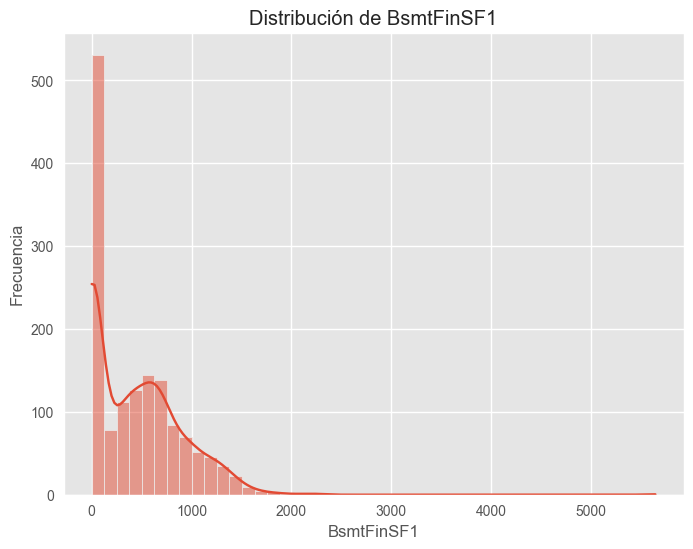

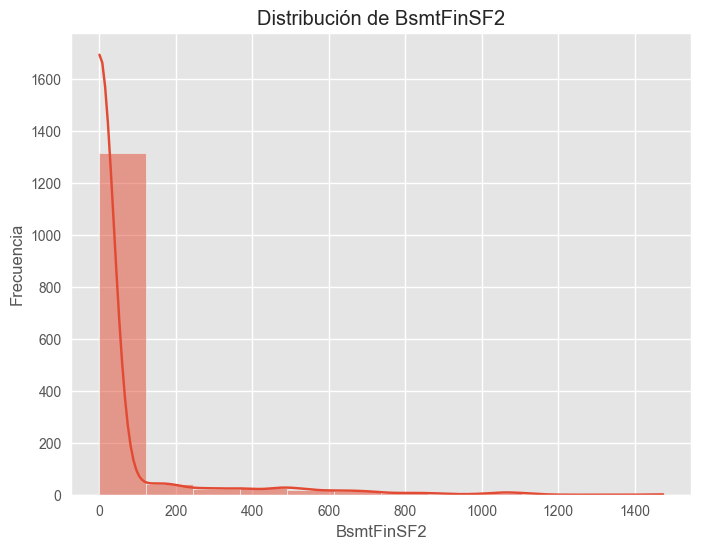

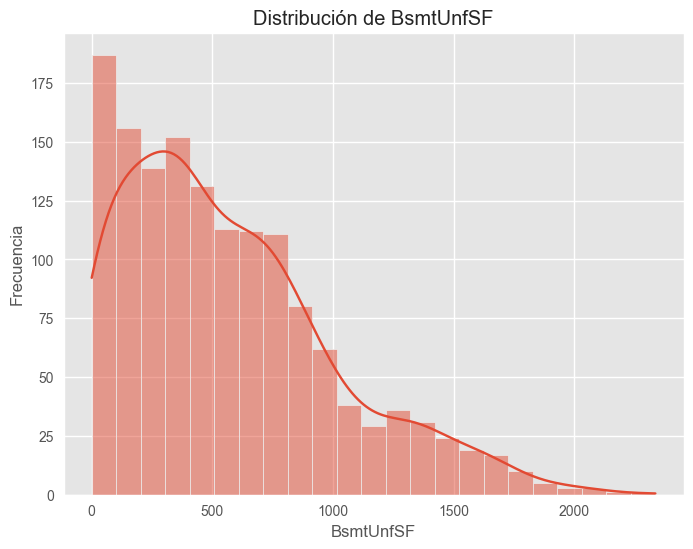

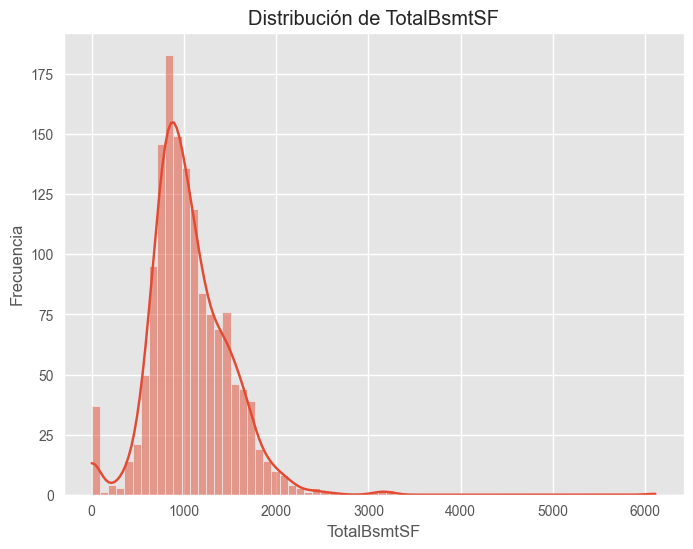

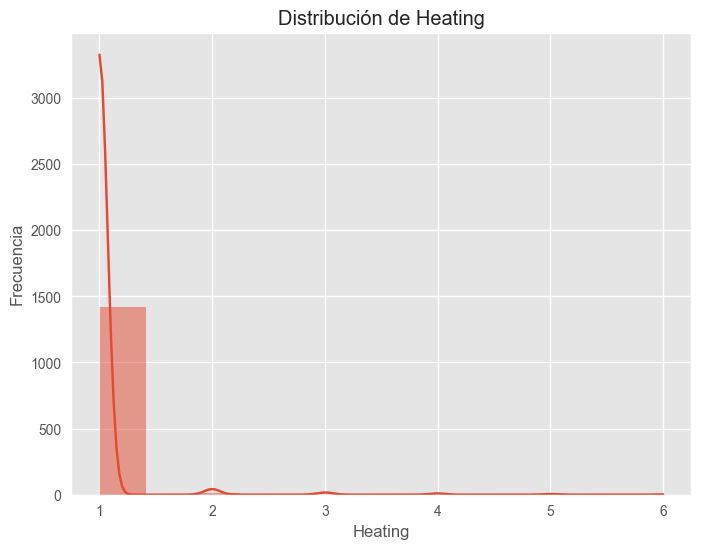

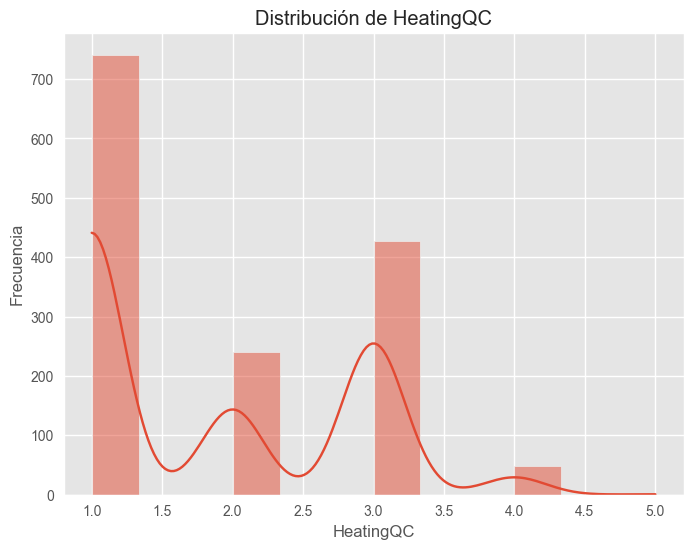

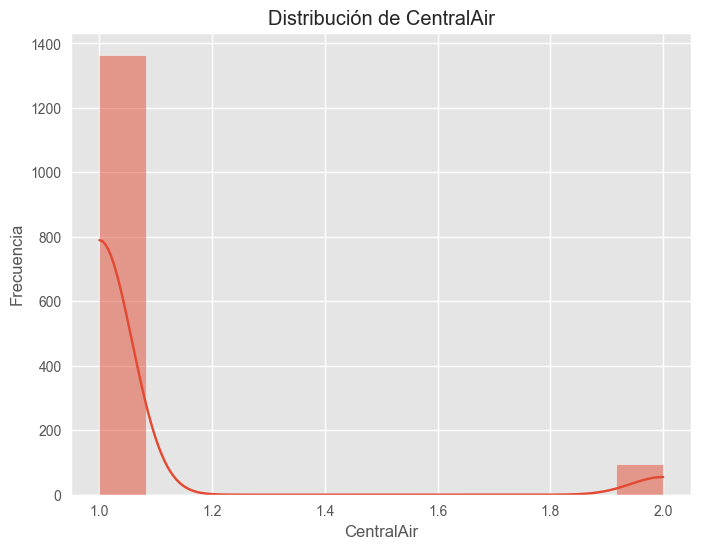

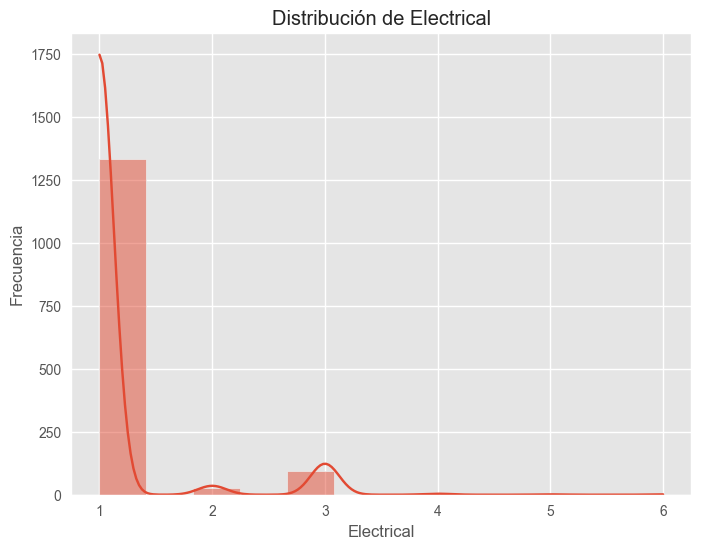

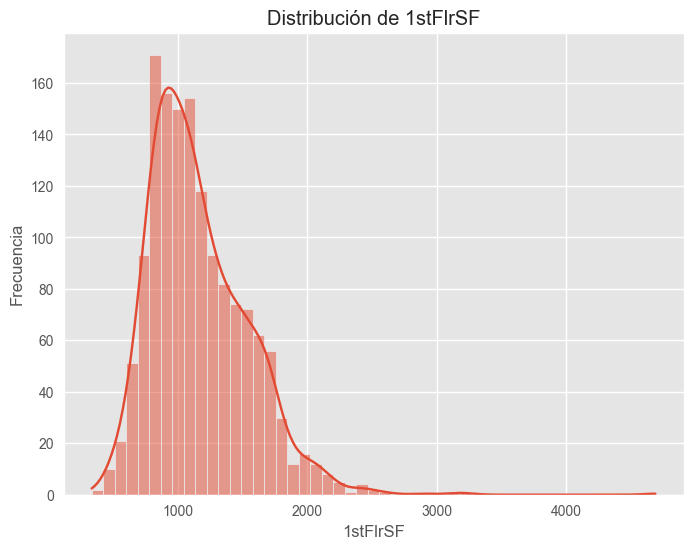

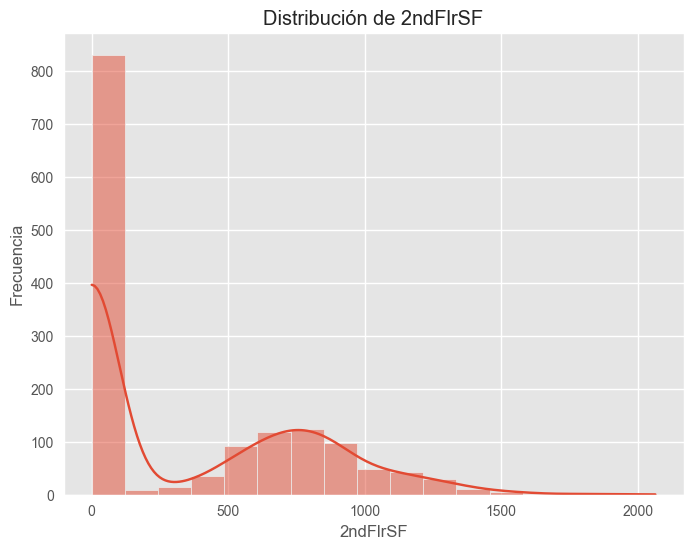

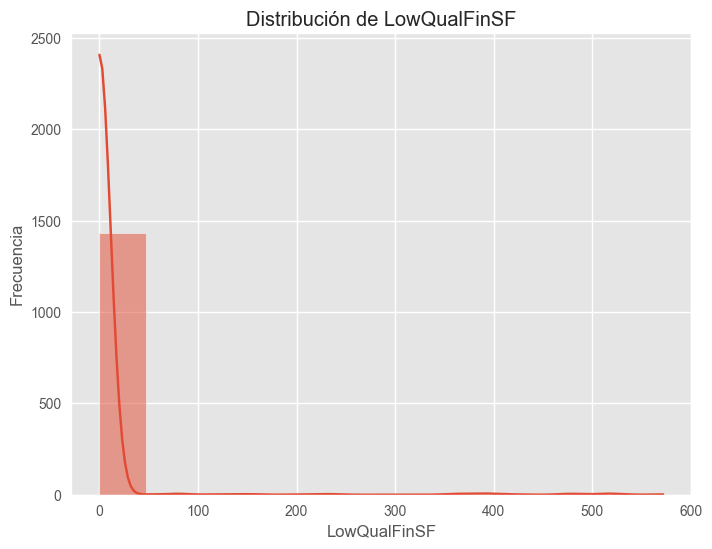

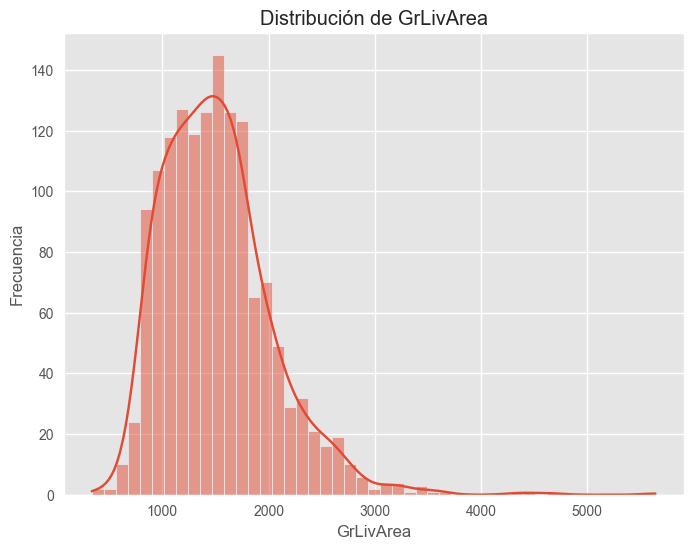

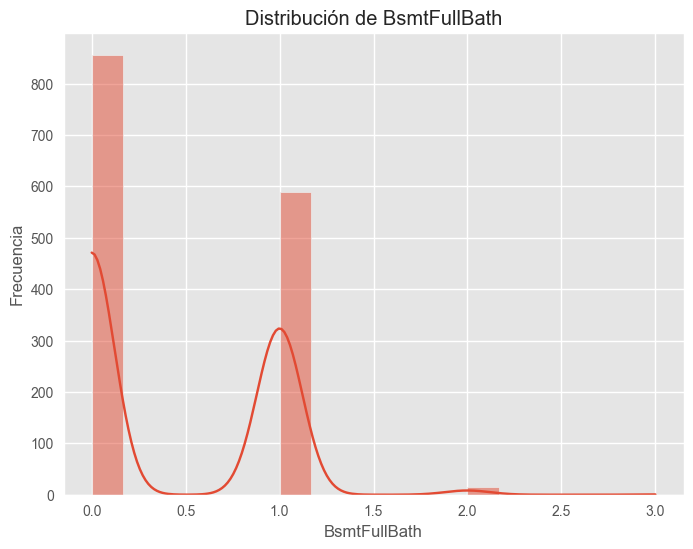

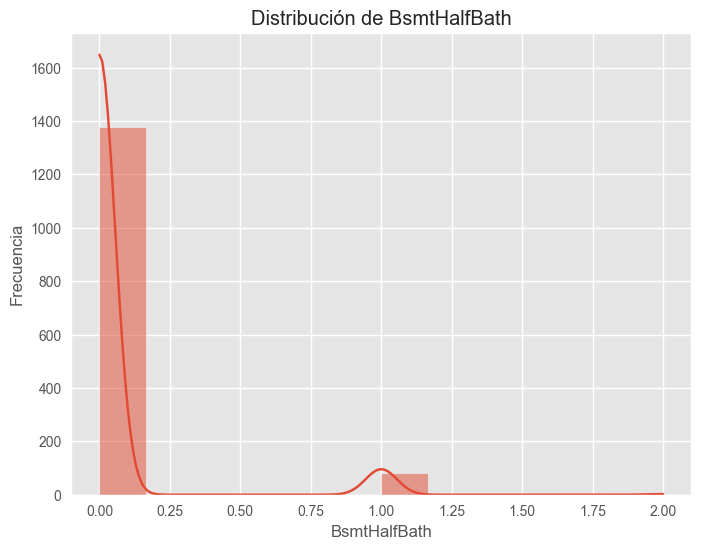

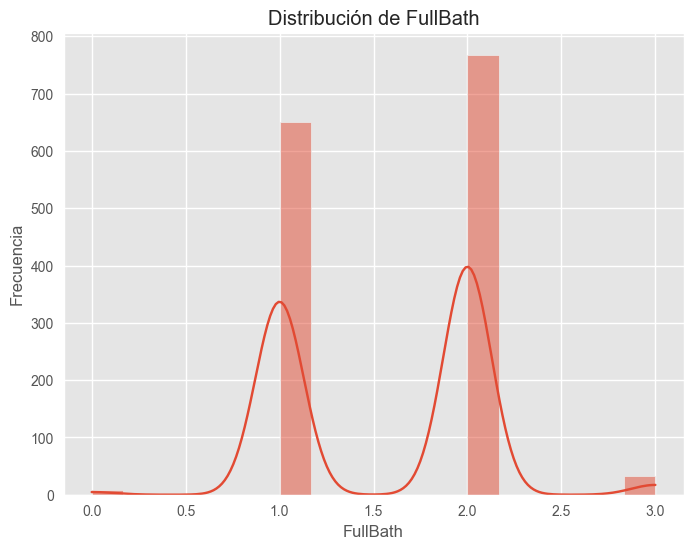

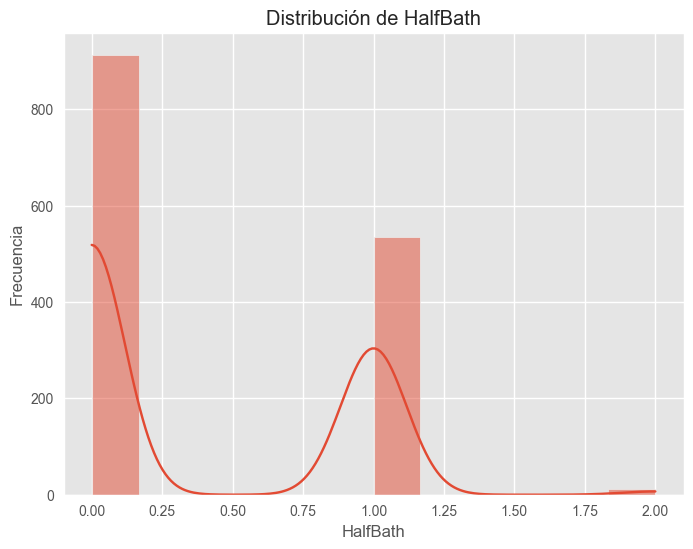

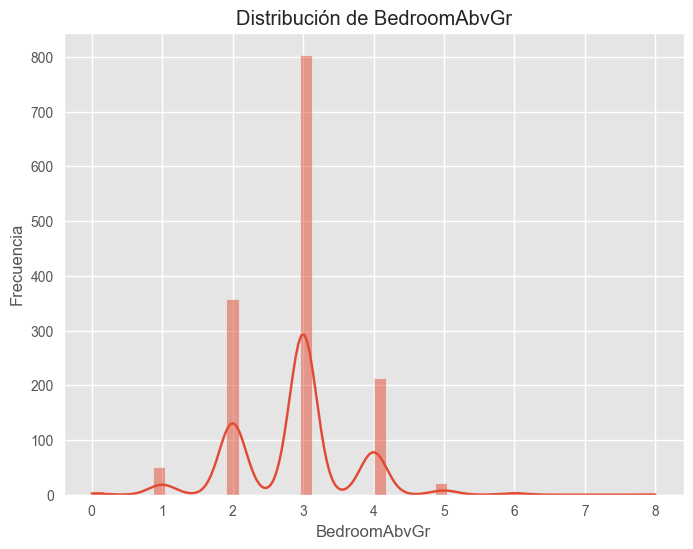

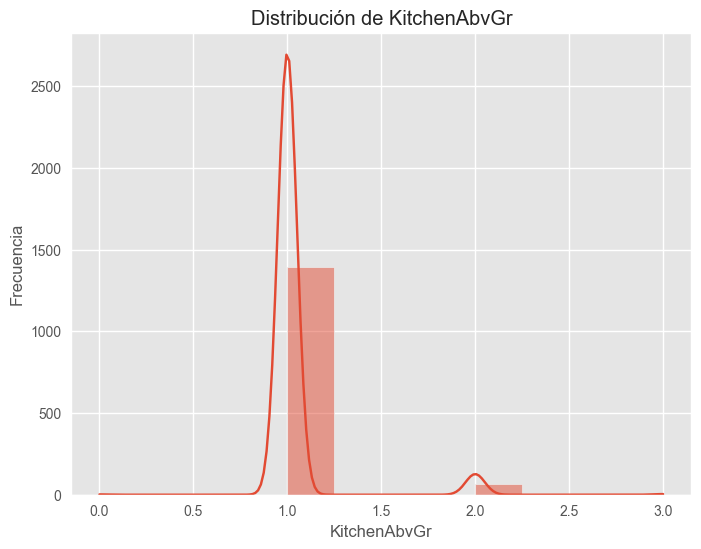

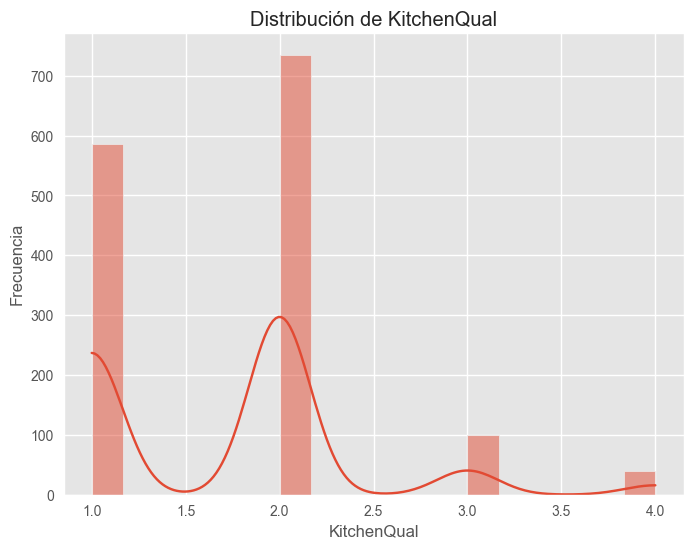

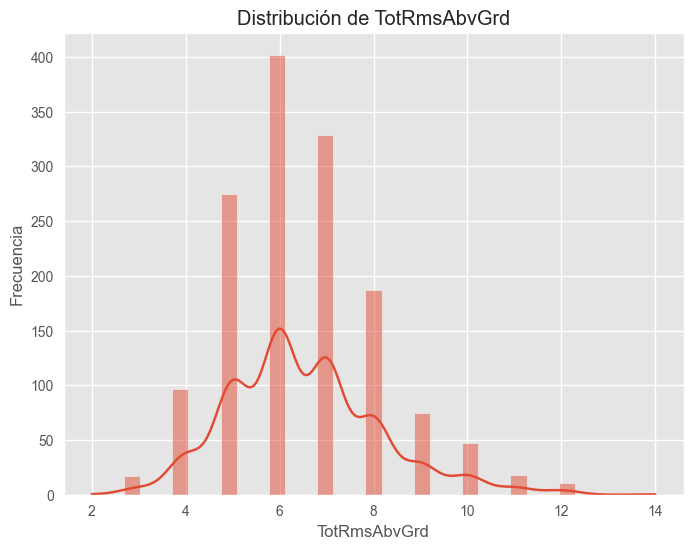

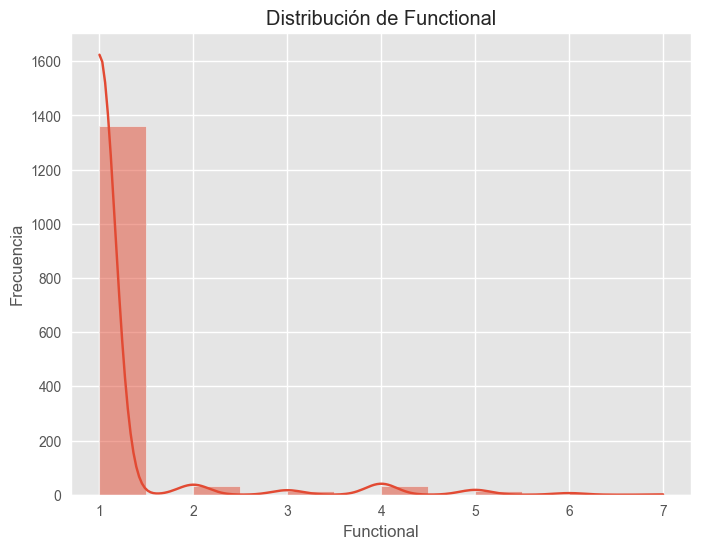

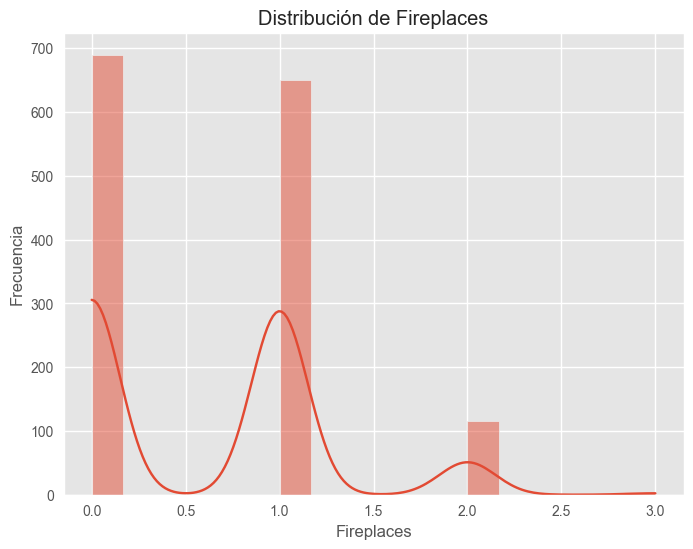

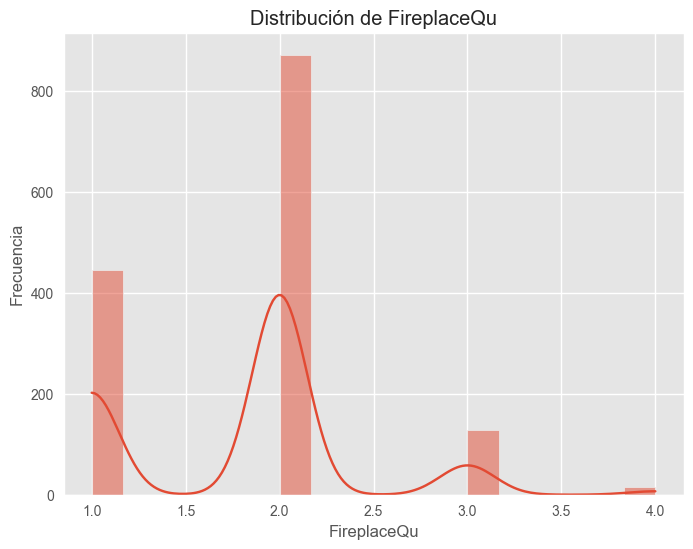

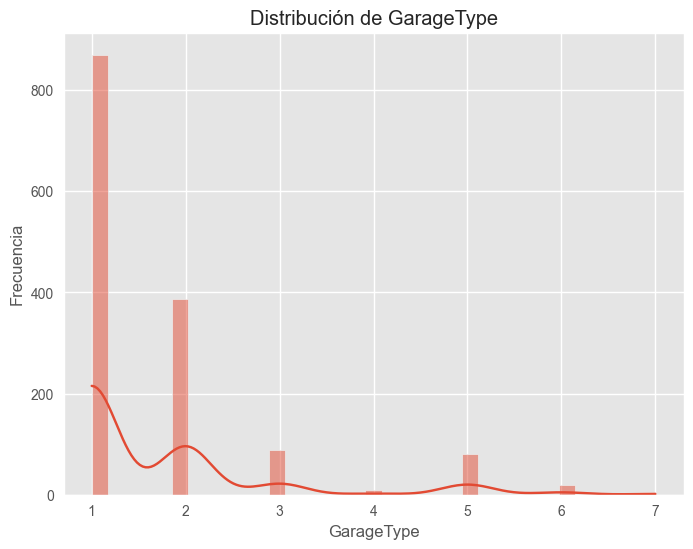

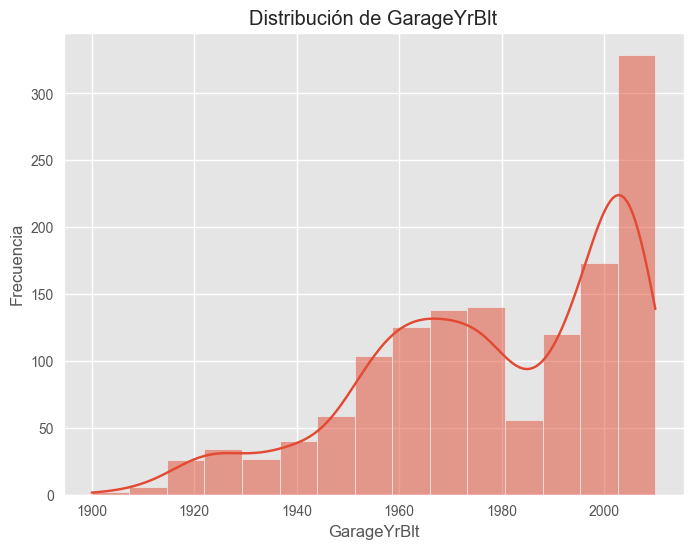

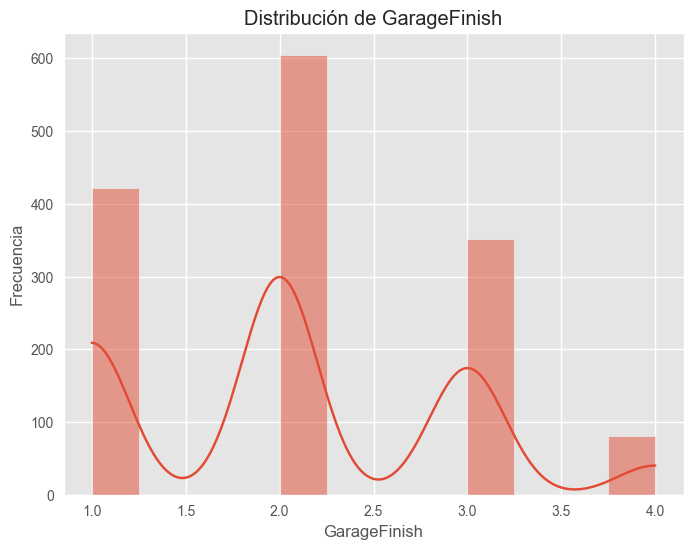

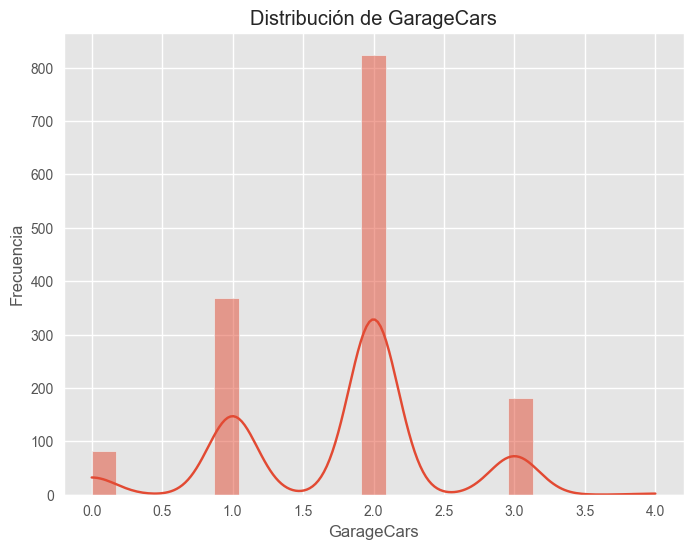

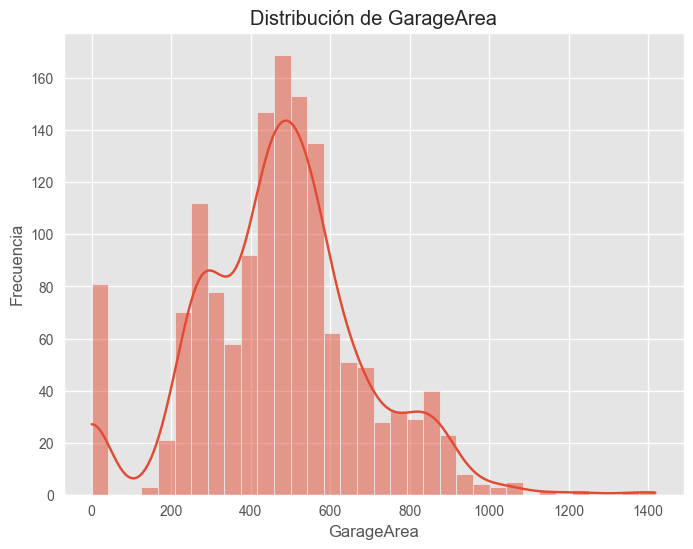

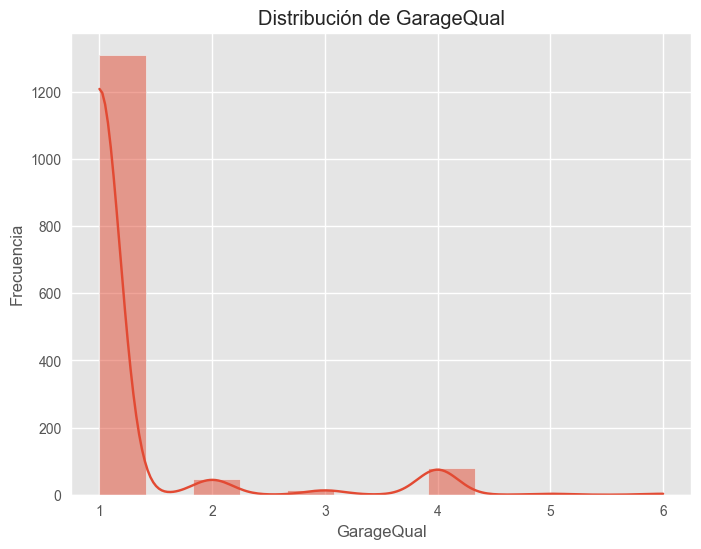

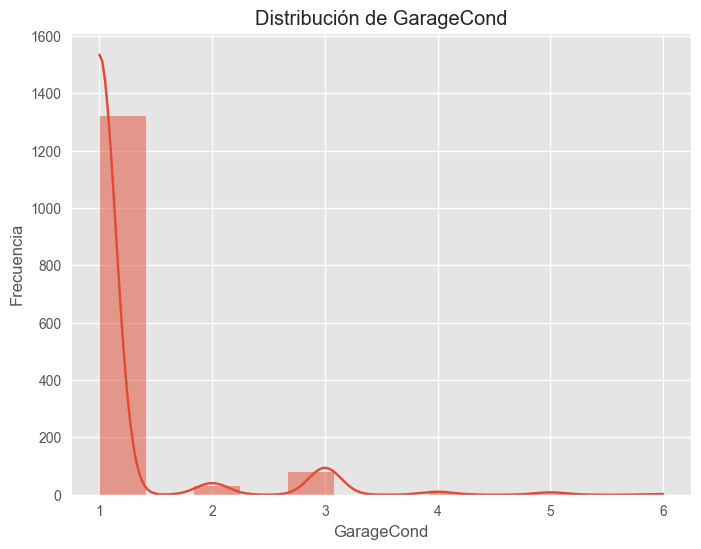

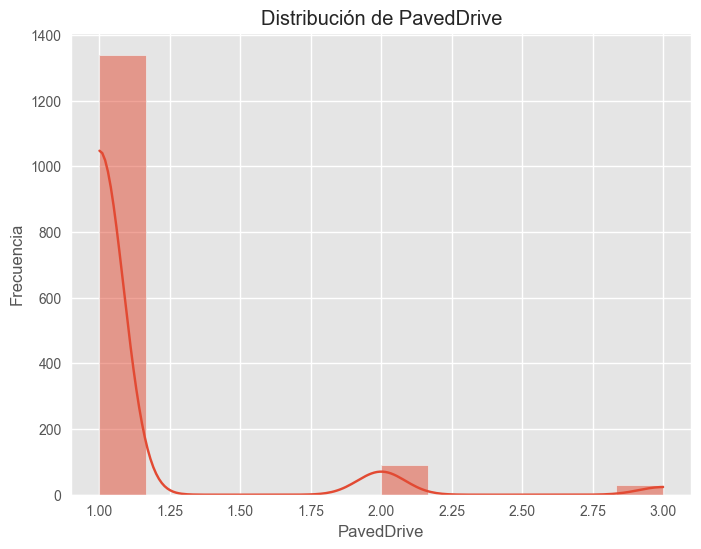

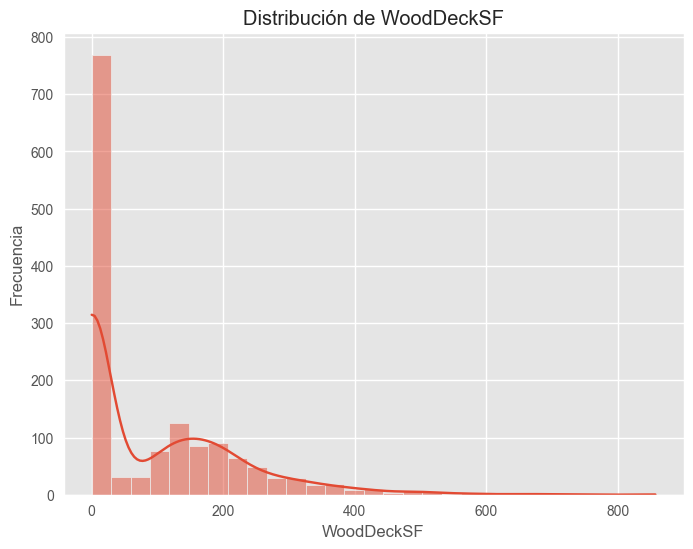

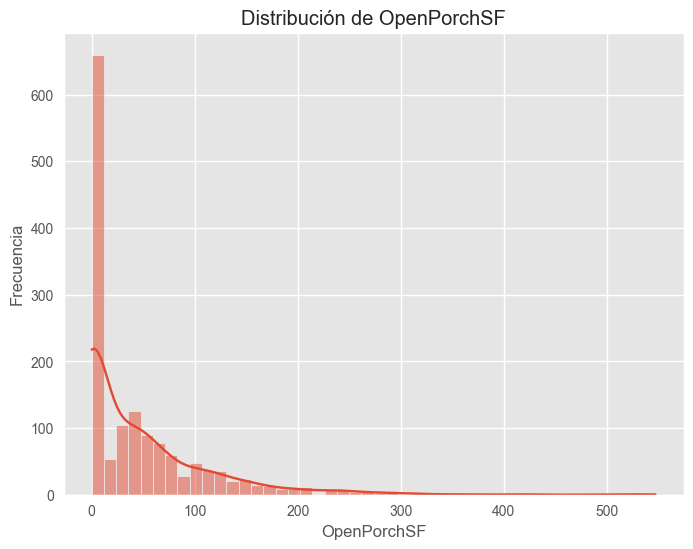

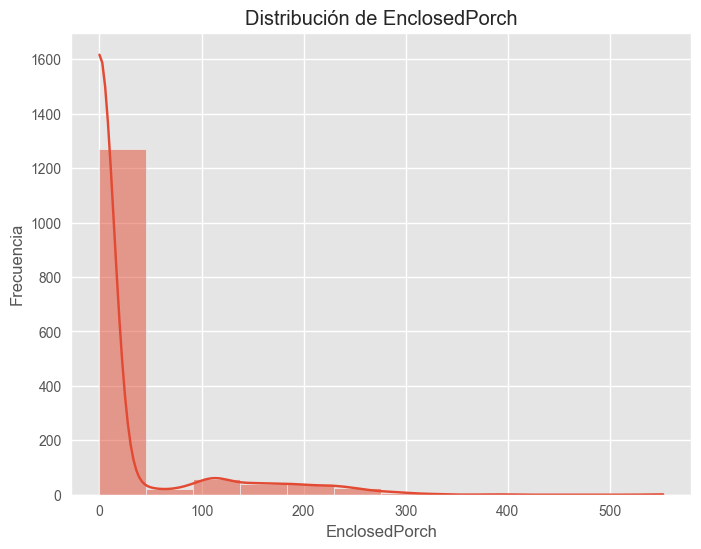

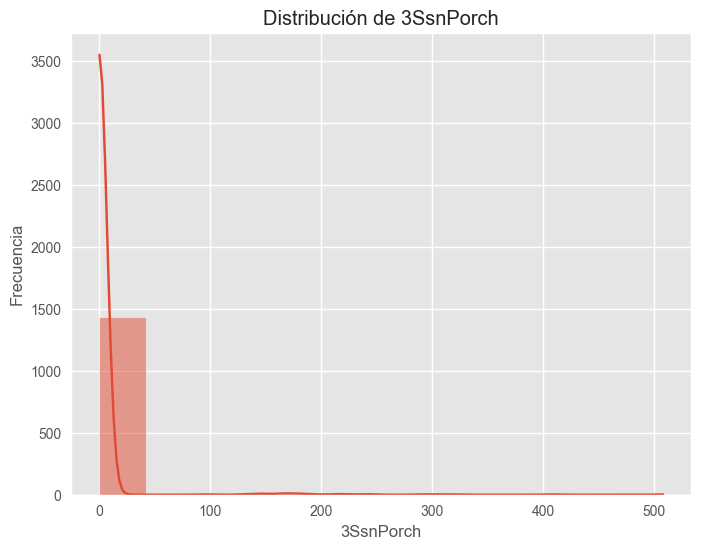

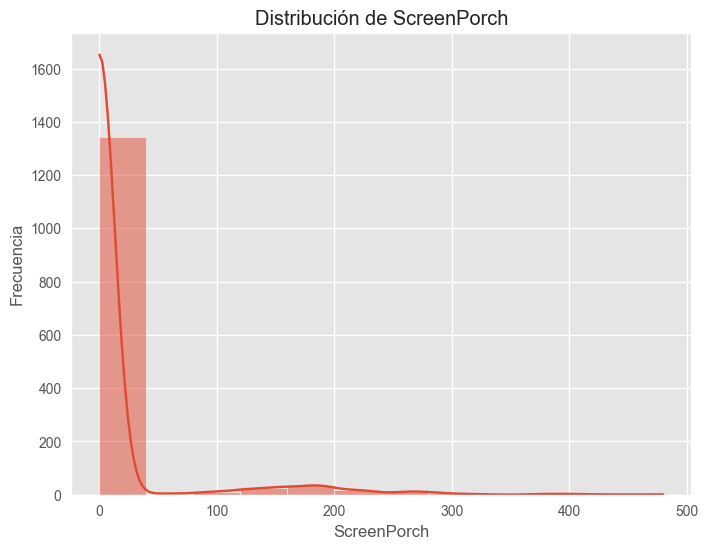

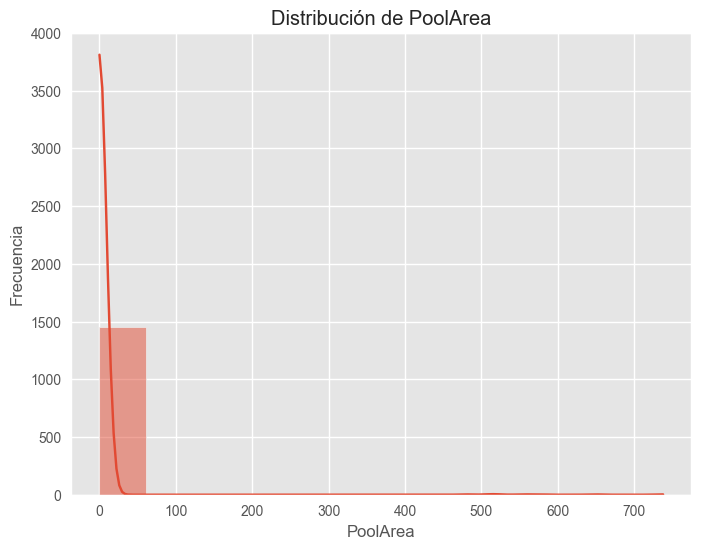

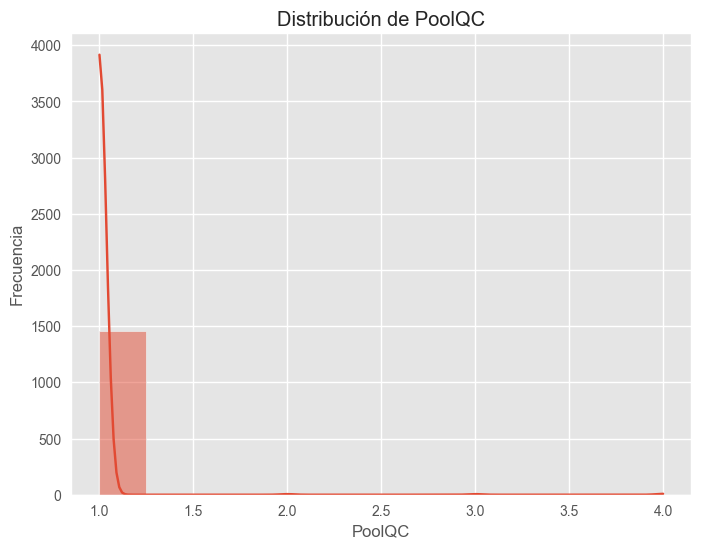

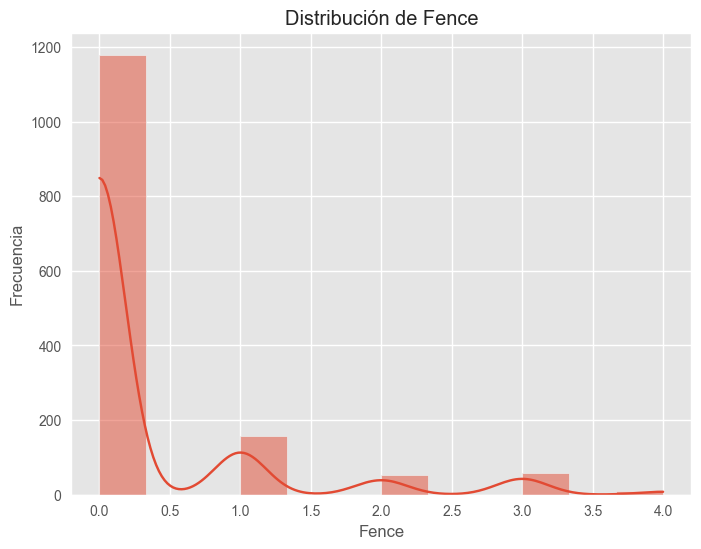

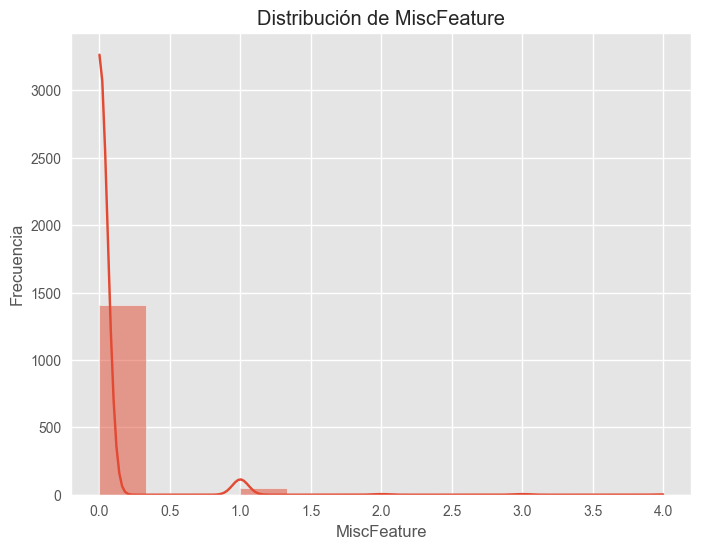

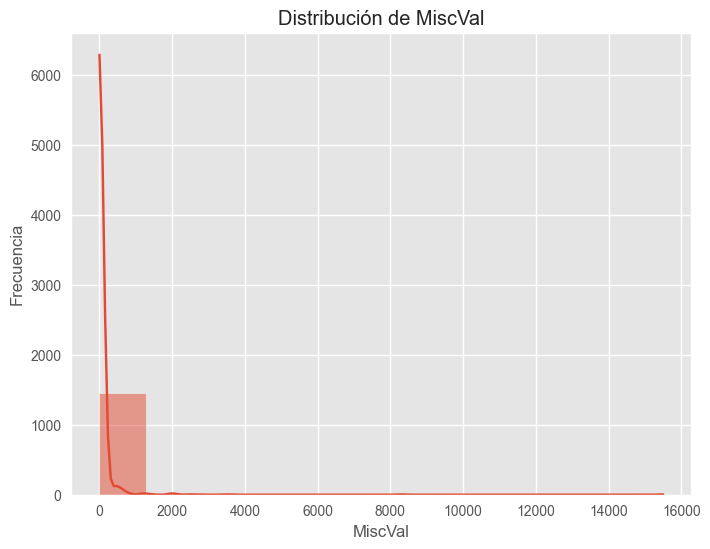

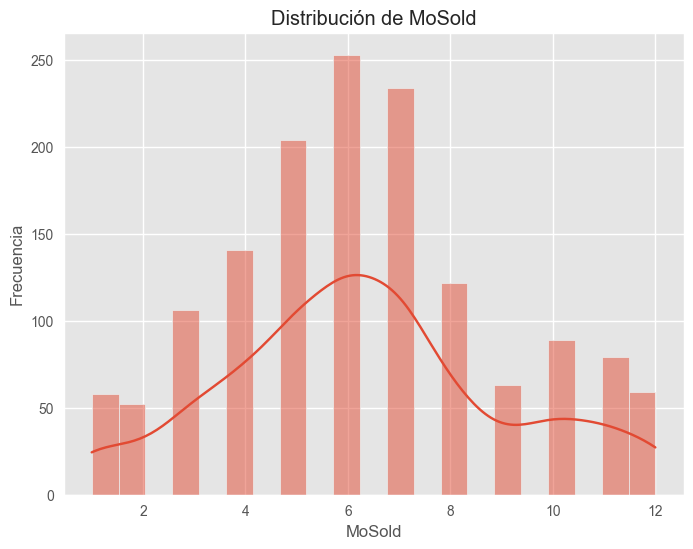

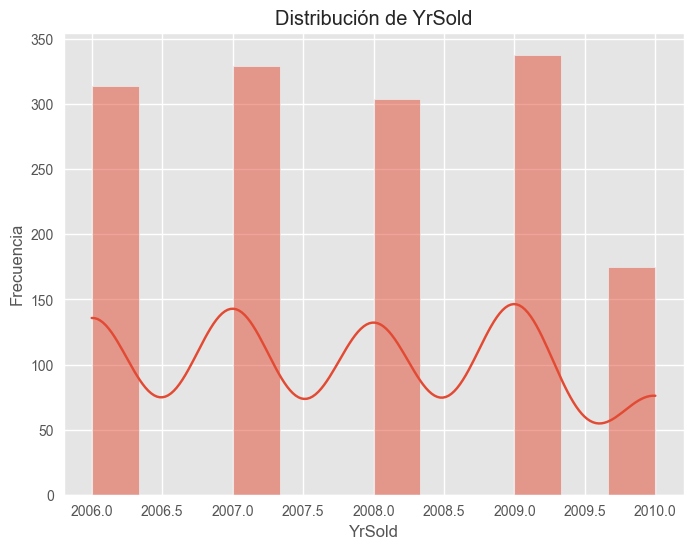

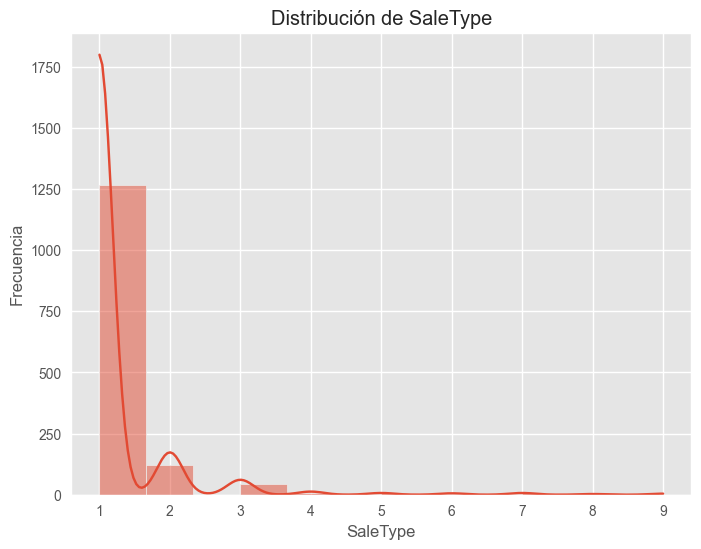

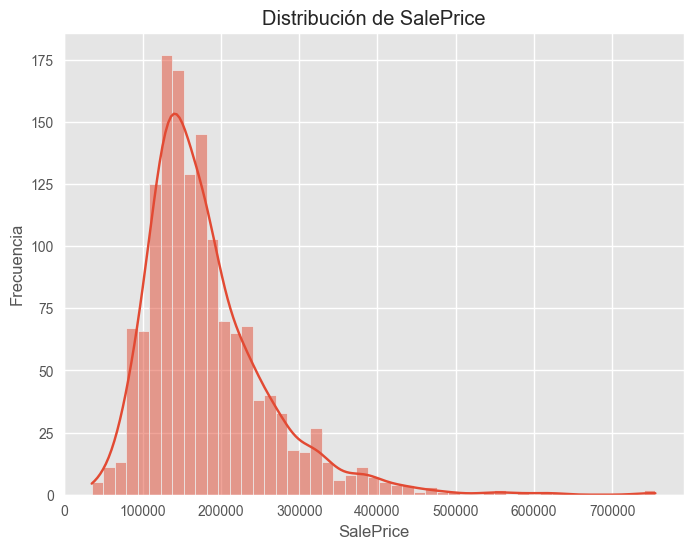

Comparación entre MSSubClass y MSZoning: Estadística=1.0000, p-valor=0.0000
Comparación entre MSSubClass y LotFrontage: Estadística=0.2452, p-valor=0.0000
Comparación entre MSSubClass y LotArea: Estadística=1.0000, p-valor=0.0000
Comparación entre MSSubClass y Street: Estadística=1.0000, p-valor=0.0000
Comparación entre MSSubClass y Alley: Estadística=1.0000, p-valor=0.0000
Comparación entre MSSubClass y LotShape: Estadística=1.0000, p-valor=0.0000
Comparación entre MSSubClass y LandContour: Estadística=1.0000, p-valor=0.0000
Comparación entre MSSubClass y Utilities: Estadística=1.0000, p-valor=0.0000
Comparación entre MSSubClass y LotConfig: Estadística=1.0000, p-valor=0.0000
Comparación entre MSSubClass y LandSlope: Estadística=1.0000, p-valor=0.0000
Comparación entre MSSubClass y Neighborhood: Estadística=0.9336, p-valor=0.0000
Comparación entre MSSubClass y Condition1: Estadística=1.0000, p-valor=0.0000
Comparación entre MSSubClass y Condition2: Estadística=1.0000, p-valor=0.0000
C

In [74]:
df = dataframe.copy()
df2 = df.select_dtypes(include='number').copy()

shapiro_results = []
shapiro_resultsD = {}
anderson_results = []
anderson_resultsD = {}

for column in df2.columns:
    stat, p_value = shapiro(df[column])
    print(f'Columna {column}: Estadística={stat:.4f}, p-valor={p_value:.4f}')
    
    # Interpretación del resultado
    if p_value > 0.05:
        print(f'\033[92mLa columna {column} sigue una distribución normal.\033[0m')
        shapiro_results.append(column)
        shapiro_resultsD[column] = p_value
    else:
        print(f'\033[91mLa columna {column} no sigue una distribución normal.\033[0m')
    
for column in df2.columns:
    result = anderson(df[column])
    statistic = result.statistic
    critical_values = result.critical_values
    significance_level = result.significance_level

    print(f'Columna {column}: Estadística={statistic:.4f}')

    # Comparar la estadística con los valores críticos
    for i, alpha in enumerate([15.0, 10.0, 5.0, 2.5, 1.0]):
        if statistic > critical_values[i]:
            print(f'La columna {column} no sigue una distribución normal al {alpha}% de confianza.')
            break
    else:
        print(f'\033[92mLa columna {column} sigue una distribución normal al 1% de confianza.\033[0m')
        anderson_results.append(column)
        anderson_resultsD[column] = statistic


for column in df2.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Prueba de Kolmogorov-Smirnov para cada par de columnas
for i in range(len(df2.columns)):
    for j in range(i+1, len(df2.columns)):
        stat, p_value = ks_2samp(df2.iloc[:, i], df2.iloc[:, j])
        print(f'Comparación entre {df2.columns[i]} y {df2.columns[j]}: Estadística={stat:.4f}, p-valor={p_value:.4f}')


# Resultados
De esta manera las columnas que muestran distribuciones normales son:

In [75]:
print("Segun Shapiro las que siguen una distribucion normal son:")

for shap in shapiro_results:
    print(shap,"con un p value de : ", shapiro_resultsD[shap])

print("\nSegun Anderson las que siguen una distribucion normal son:")
for andie in anderson_results:
    print(andie, "con un valor de: ", anderson_resultsD[andie])

Segun Shapiro las que siguen una distribucion normal son:
MasVnrArea con un p value de :  1.0
GarageYrBlt con un p value de :  1.0

Segun Anderson las que siguen una distribucion normal son:
MasVnrArea con un valor de:  nan
GarageYrBlt con un valor de:  nan


Tras realizar el análisis exploratorio se decidió hacer un mapa de calor de los datos para obtener una matriz de correlación y así verificar si existen relaciones lineales entre las variables estudiadas.

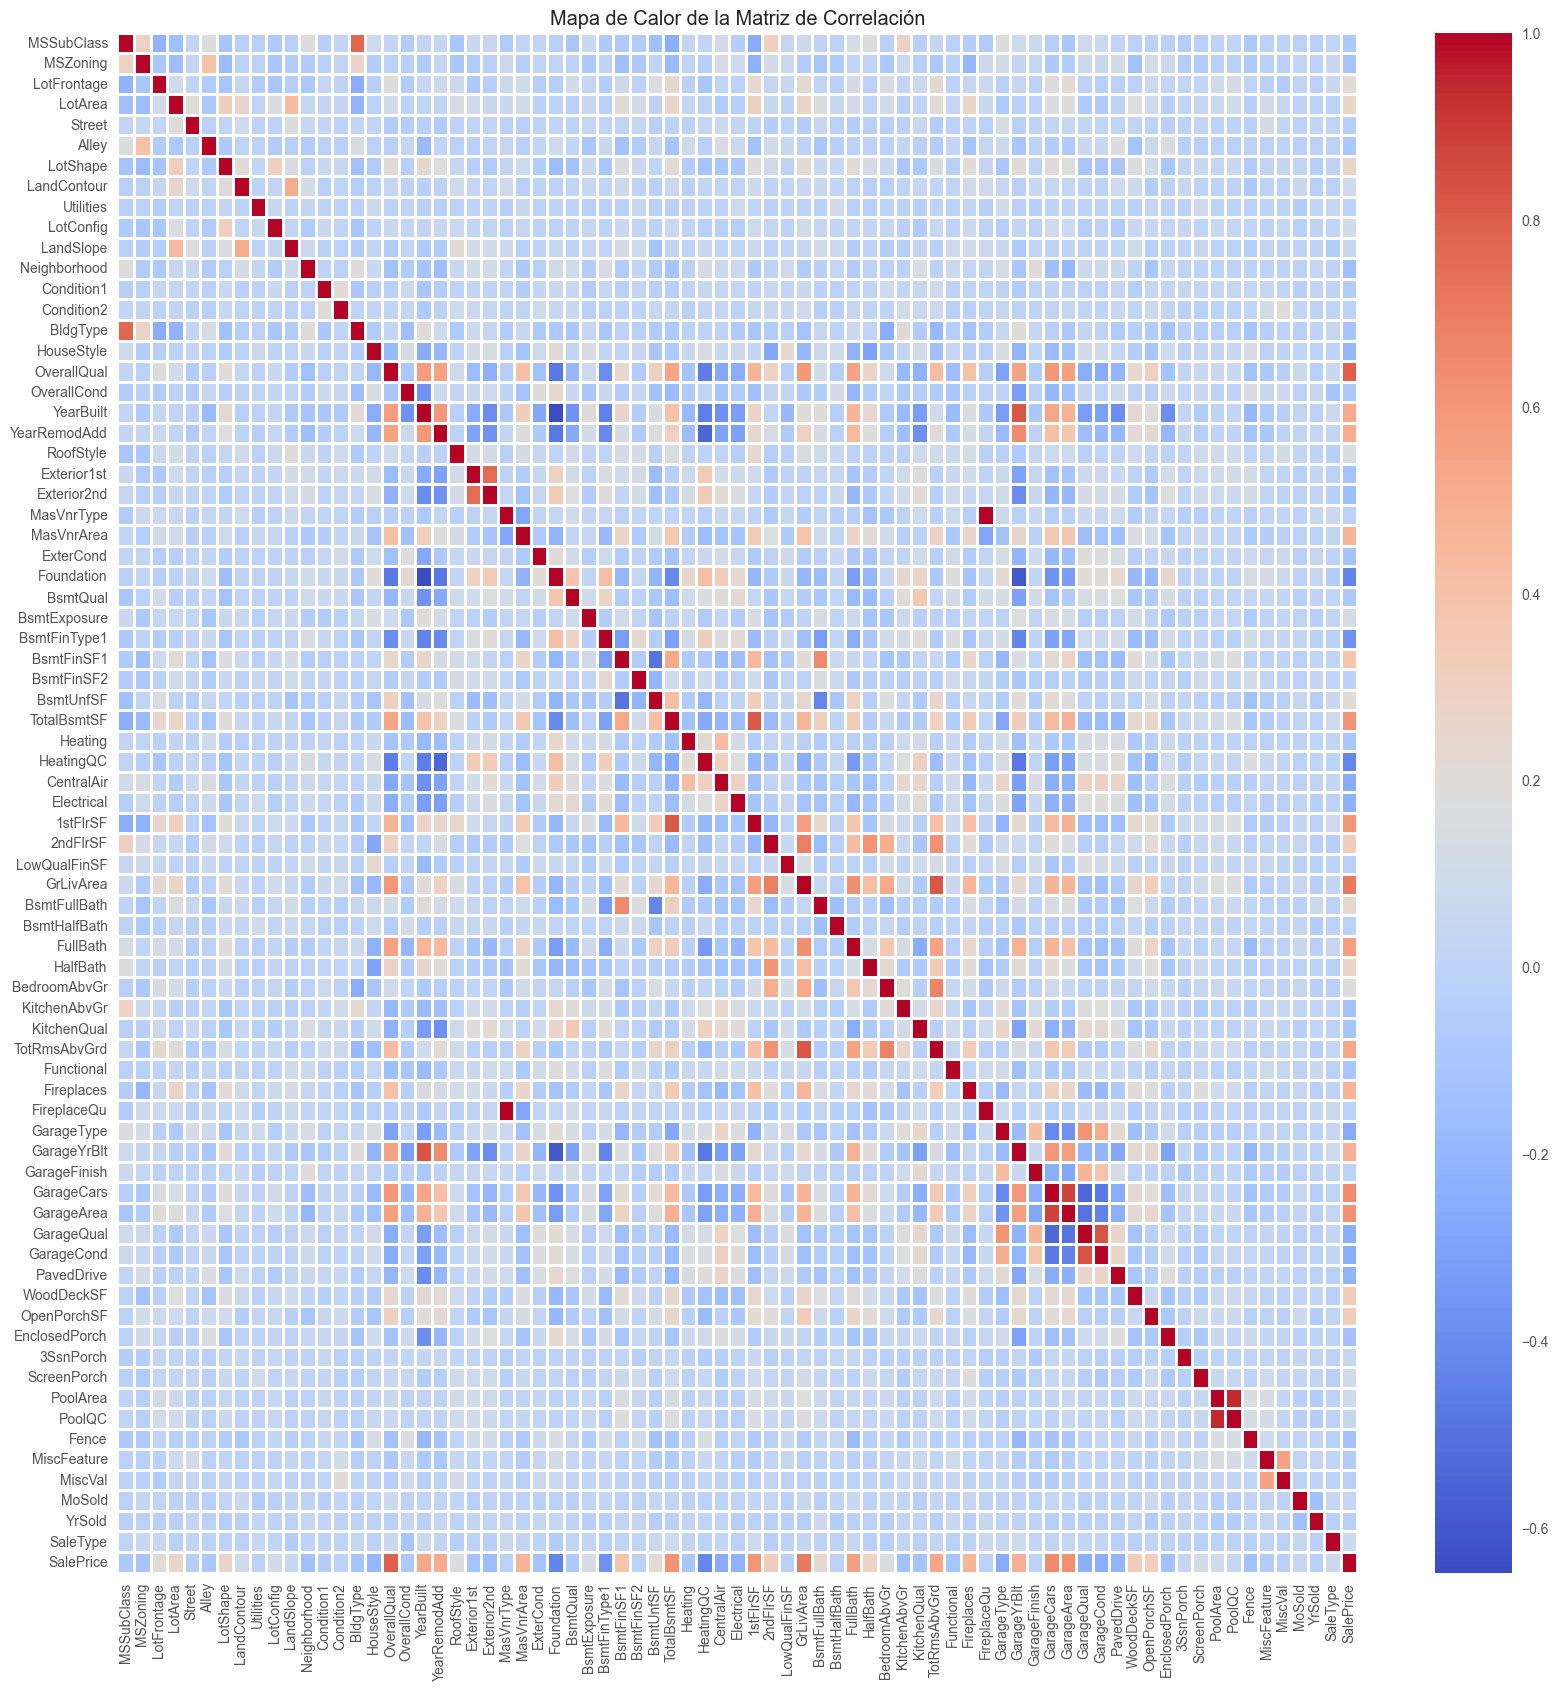

In [76]:
df_numeric = dataframe.select_dtypes(include='number').copy()

# Mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(20, 20))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=1)

plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

De las correlaciones relevantes relacionadas con la variable de estudio **salePrice** se destacan:

Correlación alta:
- OverallQual
- GarageCars
- GarageArea
- GrLivArea
- FullBath
- Fireplaces

Correlación media-alta:
- YearBuilt
- YearRemodAdd
- MasVnrArea
- 1stFIrSF
- TotRmsAbvGrd
- GarageYrBlt
  
Correlación media:
- LotFrontage
- LotArea
- LotShape
- BsmtUnfSF
- 2ndSFrSF
- BsmtFullBath
- HalfBath
- BedroomAbrGr
- WoodDeckSF
- OpenPorchSF

Del total de columnas que contenía el dataset original, únicamente no se tomarán en cuenta 5 para el clustering de datos. 

In [77]:
len(df.columns) - len(df2.columns)


5

## Parte 3 Clustering

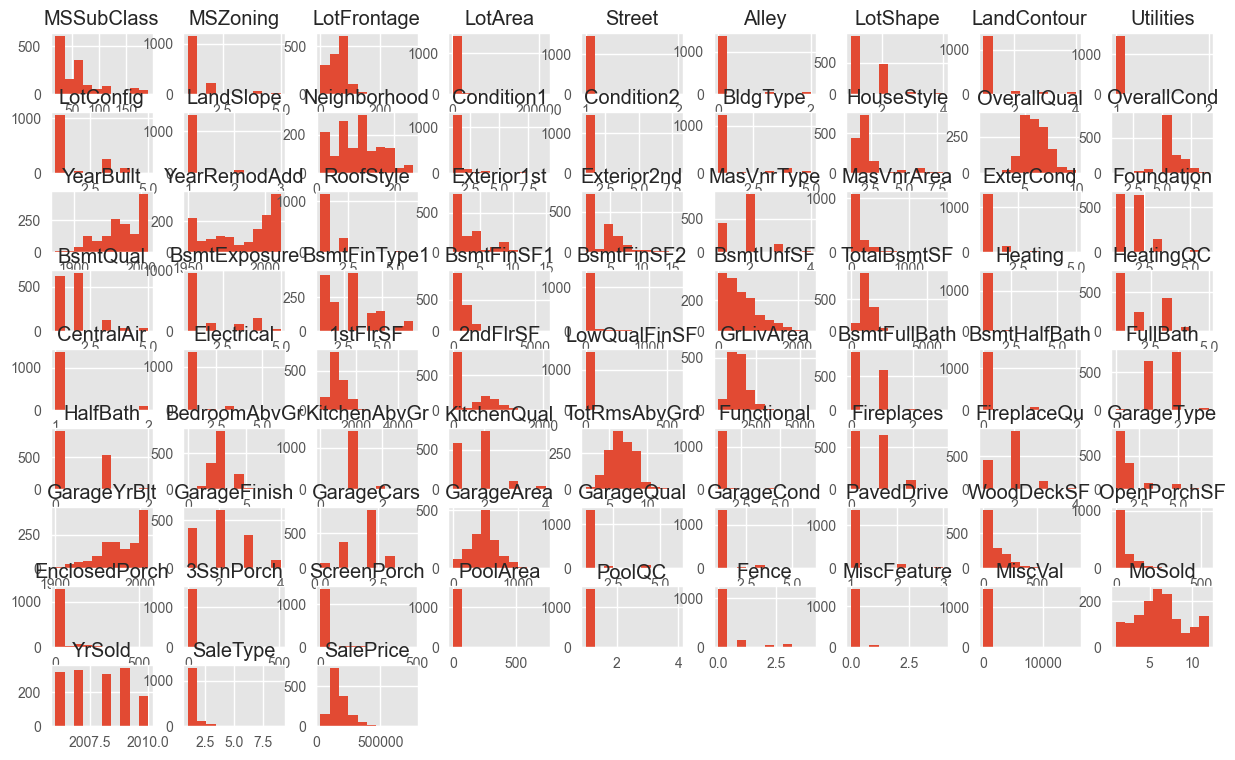

In [78]:

df2.groupby('SalePrice').size()
df2.hist()

plt.show()

In [79]:
X = np.array(df2.dropna())
Y = np.array(df2['SalePrice'])
X.shape

(1371, 75)

In [80]:
random.seed(123)
X_scale=sklearn.preprocessing.scale(X)

pyclustertend.hopkins(X,len(X))

0.02808449682914368

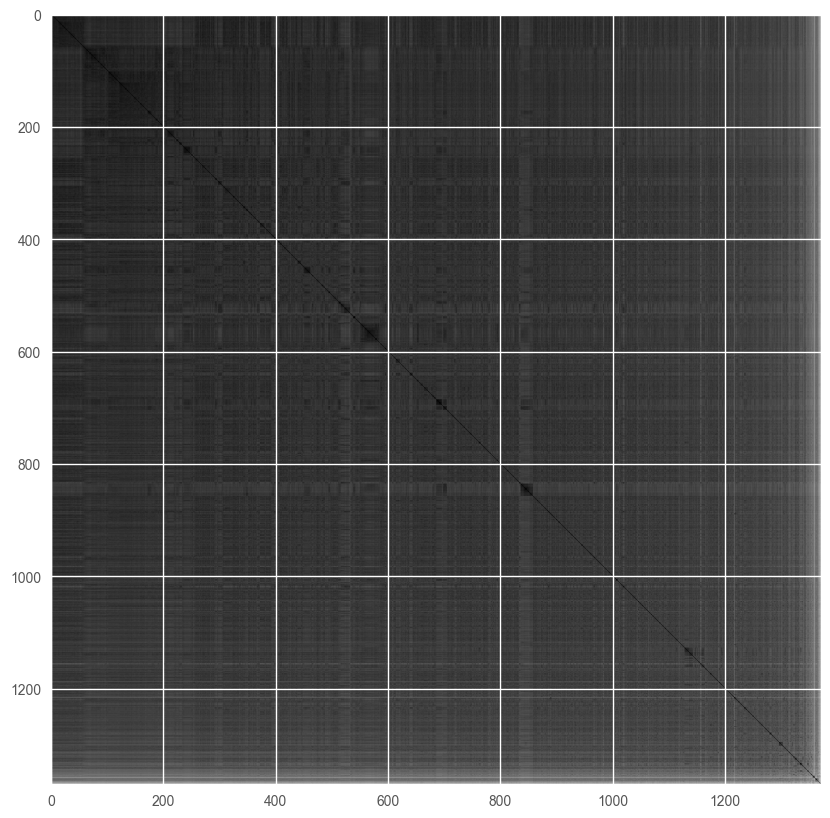

In [81]:
pyclustertend.vat(X_scale)

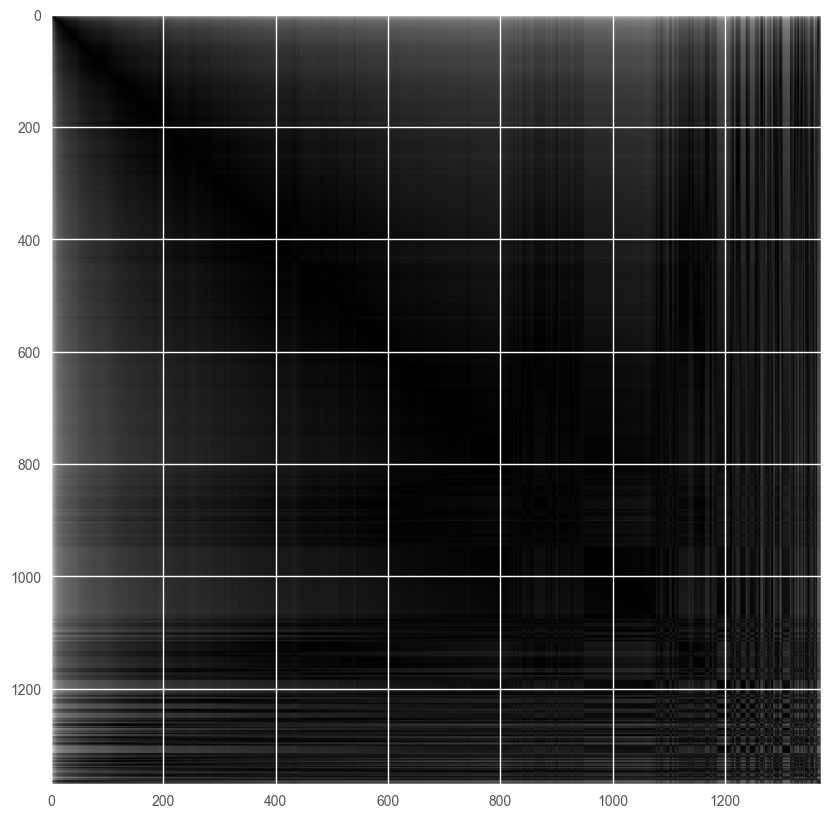

In [82]:
pyclustertend.vat(X)

  0%|          | 0/3 [00:00<?, ?it/s]

Elbow Score Plot (distortion metric):
elbow value = optimal k: 5  | elbow score: 899,272,419,548.418


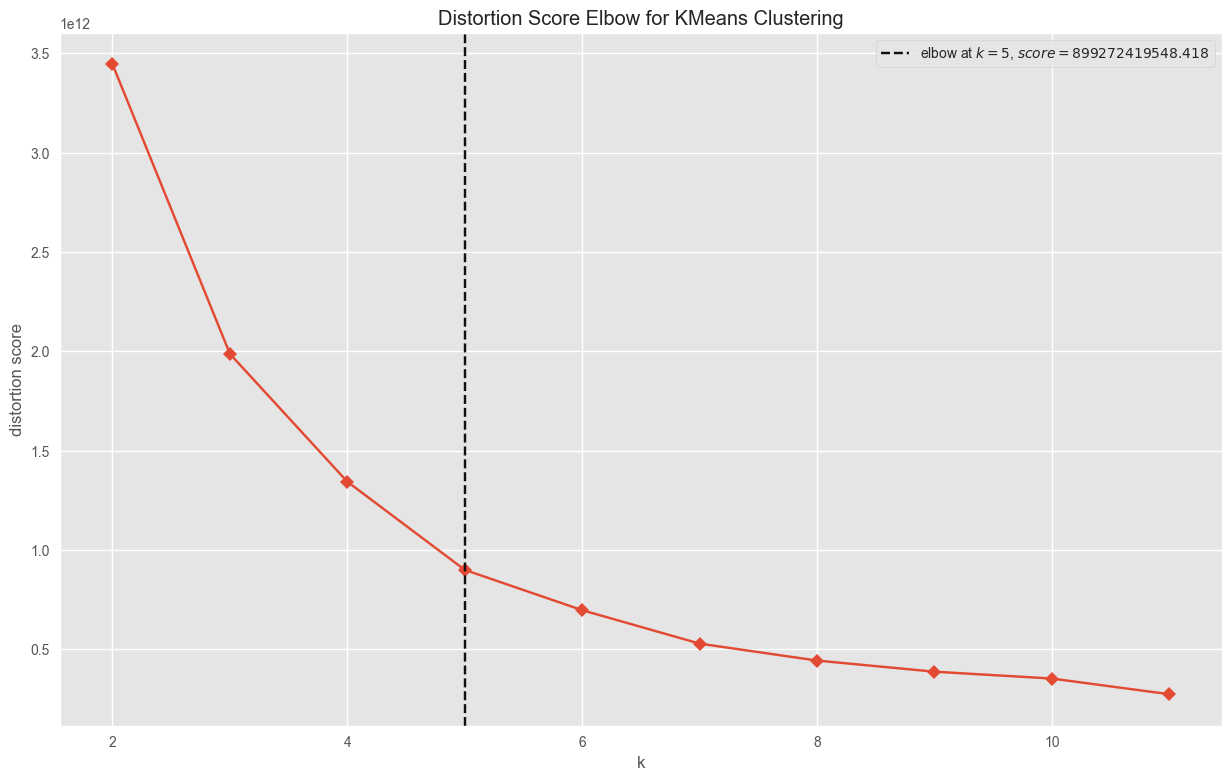

 33%|███▎      | 1/3 [00:00<00:00,  3.22it/s]

Elbow Score Plot (silhouette metric):
elbow value = optimal k: 2  | elbow score: 0.630


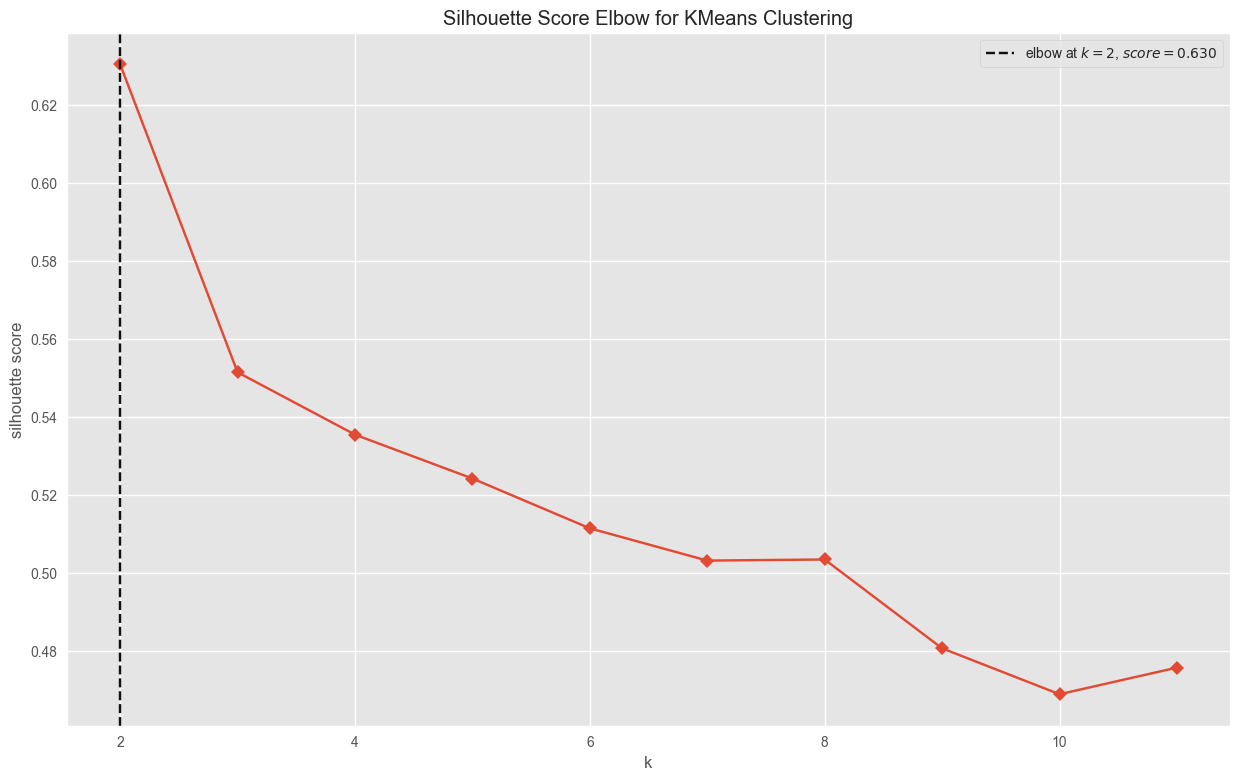

 67%|██████▋   | 2/3 [00:00<00:00,  2.49it/s]

Elbow Score Plot (calinski_harabasz metric):
elbow value = optimal k: 7  | elbow score: 3,504.459


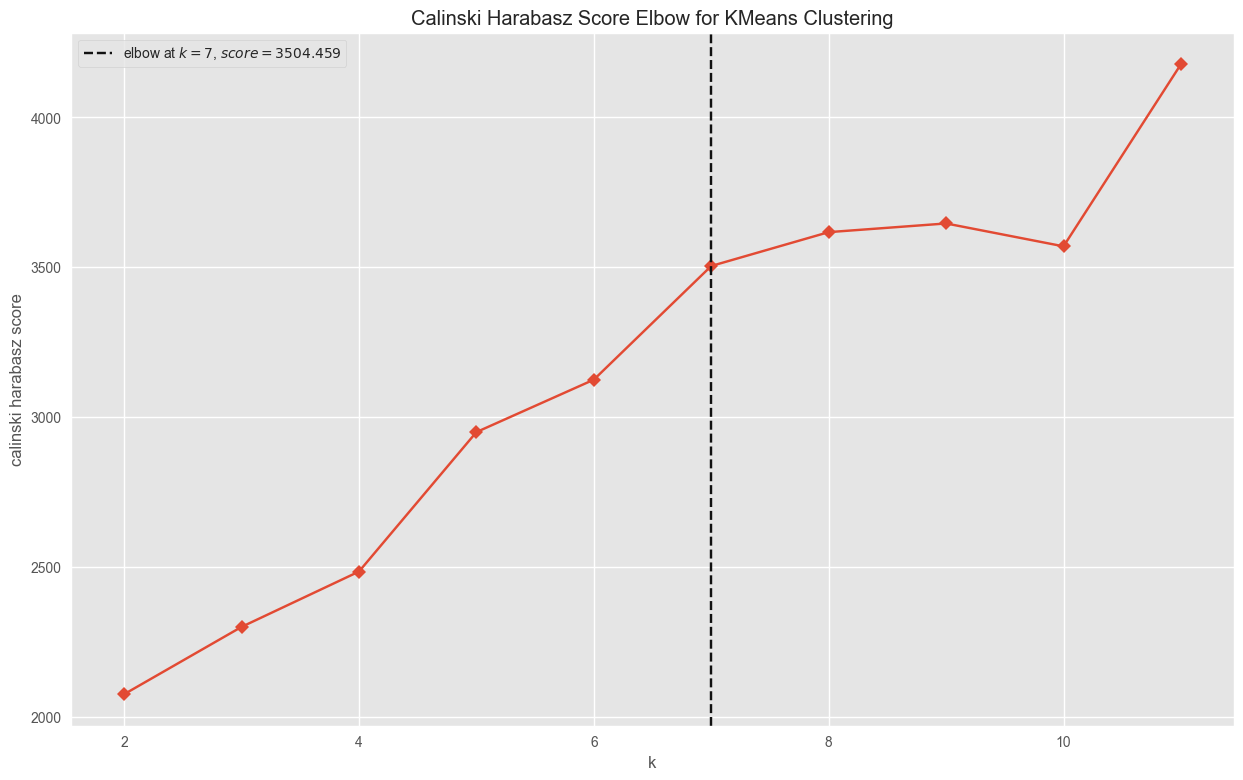

100%|██████████| 3/3 [00:01<00:00,  2.90it/s]


In [83]:
# get it from https://towardsdatascience.com/elbows-and-silhouettes-hands-on-customer-segmentation-in-python-66c2e794c552
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from kmodes.kprototypes import KPrototypes

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kneed import KneeLocator

from sklearn.decomposition import PCA


from tqdm import tqdm
import sys
import warnings
warnings.filterwarnings("ignore")
# elbow score plot with Yellowbrick
nK = 12    
RNDN = 42    
def elbowplot(df2, elbowmetric, model):
    print("Elbow Score Plot (" + str(elbowmetric) + " metric):")
    vis = KElbowVisualizer(
        model, 
        k=(2,nK), 
        metric=elbowmetric,
        locate_elbow=True, 
        timings=False)
    vis.fit(df2)      
    print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
            " | elbow score:", f'{vis.elbow_score_:,.3f}')
    vis.show()  
    
    
    
# call elbow plot for each of 3 alternative metrics
    # distortion = mean sum of squared distances to center
    # silhouette = mean ratio of intra-cluster and nearest-cluster distance
    # calinski = ratio of within to between cluster dispersion

model = KMeans(random_state=RNDN)
_ = [elbowplot(X, m, model) for m in tqdm(["distortion", "silhouette", "calinski_harabasz"])]  

In [84]:
km = cluster.KMeans(n_clusters=5).fit(X)
print (km)

KMeans(n_clusters=5)


In [85]:
centroides = km.cluster_centers_
print(centroides)

[[ 6.01939655e+01  1.27586207e+00  5.46681034e+01  1.01187500e+04
   1.00215517e+00  1.33620690e-01  1.48060345e+00  1.14224138e+00
   1.00000000e+00  1.62068966e+00  1.05172414e+00  1.04482759e+01
   1.44612069e+00  1.03017241e+00  1.48491379e+00  2.13362069e+00
   6.24137931e+00  5.57758621e+00  1.97916810e+03  1.98898707e+03
   1.22413793e+00  3.07327586e+00  3.23275862e+00  1.72844828e+00
   9.85107759e+01  1.12284483e+00  1.56465517e+00  1.48922414e+00
   1.71551724e+00  2.69181034e+00  4.30637931e+02  4.79008621e+01
   5.77125000e+02  1.05566379e+03  1.00431034e+00  1.73060345e+00
   1.01077586e+00  1.08620690e+00  1.15125431e+03  3.77150862e+02
   2.87500000e+00  1.53128017e+03  4.03017241e-01  7.75862069e-02
   1.68965517e+00  5.25862069e-01  2.92025862e+00  1.02155172e+00
   1.52586207e+00  6.55172414e+00  1.14655172e+00  7.39224138e-01
   1.72844828e+00  1.39655172e+00  1.98277802e+03  1.86422414e+00
   1.92241379e+00  4.90629310e+02  1.03232759e+00  1.01939655e+00
   1.06465

In [86]:
sales = km.predict(X)

In [87]:
len(X)

1371

In [88]:
print(len(df2.columns))
df2.columns

75


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

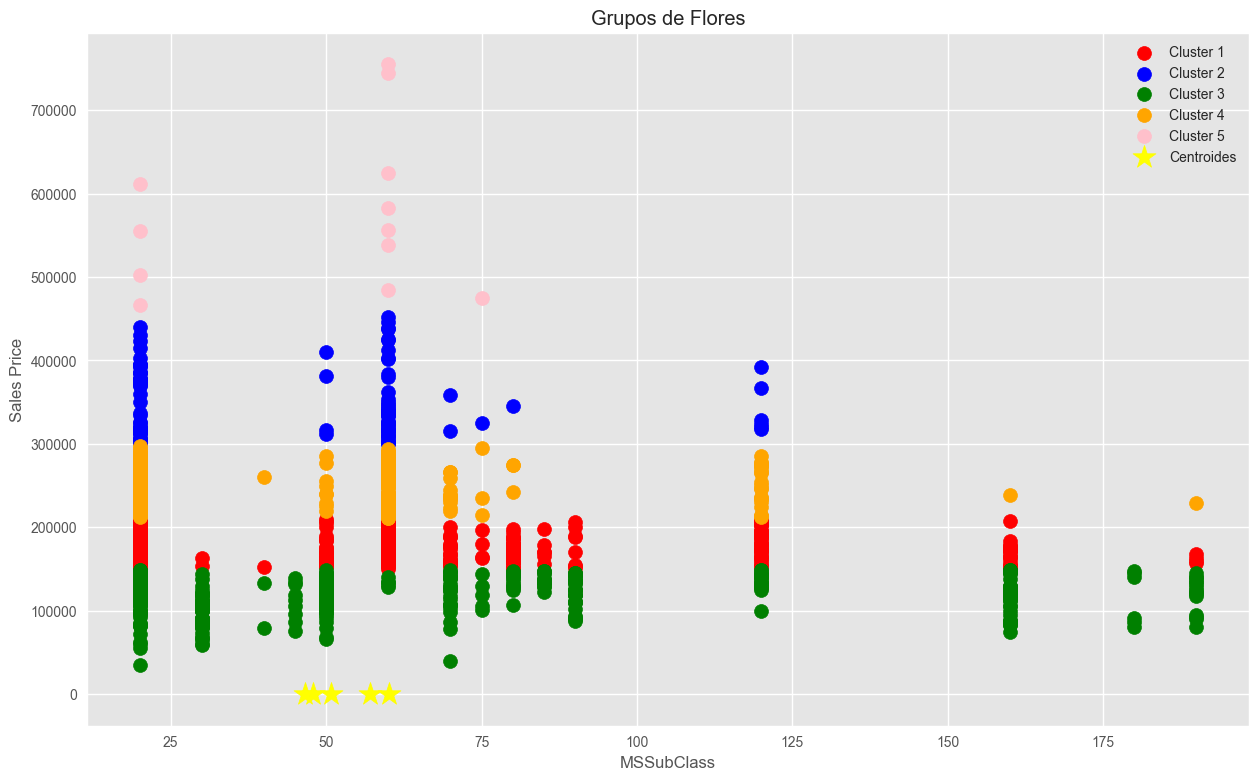

In [89]:
plt.scatter(X[sales == 0, 0], X[sales == 0, 74],s=100,c='red', label = "Cluster 1")
plt.scatter(X[sales == 1, 0], X[sales == 1, 74],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[sales == 2, 0], X[sales == 2, 74],s=100,c='green', label = "Cluster 3")
plt.scatter(X[sales == 3, 0], X[sales == 3, 74],s=100,c='orange', label = "Cluster 4")
plt.scatter(X[sales == 4, 0], X[sales == 4, 74],s=100,c='pink', label = "Cluster 5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Grupos de Flores")
plt.xlabel("MSSubClass")
plt.ylabel("Sales Price")
plt.legend()

# Ejercicio 4
## Responda las siguientes preguntas:

1. ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [90]:
dataframe.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [91]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

In [92]:
y = df2.pop('SalePrice')
X = df2

In [93]:
ds = list(df2.columns)
ds

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 

In [94]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

## Haciendo la regresion

In [95]:
p_length = y_train.values.reshape(-1,1)
p_length_t = y_test.values.reshape(-1,1)
p_width = X_train['YearRemodAdd'].values.reshape(-1,1)
p_width_t = X_test['YearRemodAdd'].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(p_width, p_length)
p_length_pred = lm.predict(p_width_t)

## Haciendo la ecuacion

In [96]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]


label = r'$p_length = %0.4f*p_width %+0.4f$'%(m,c)
print(label)

$p_length = 1949.1898*p_width -3686236.7011$


## Graficamos

Text(0.5, 1.0, 'Test Set SalePrice vs LotArea')

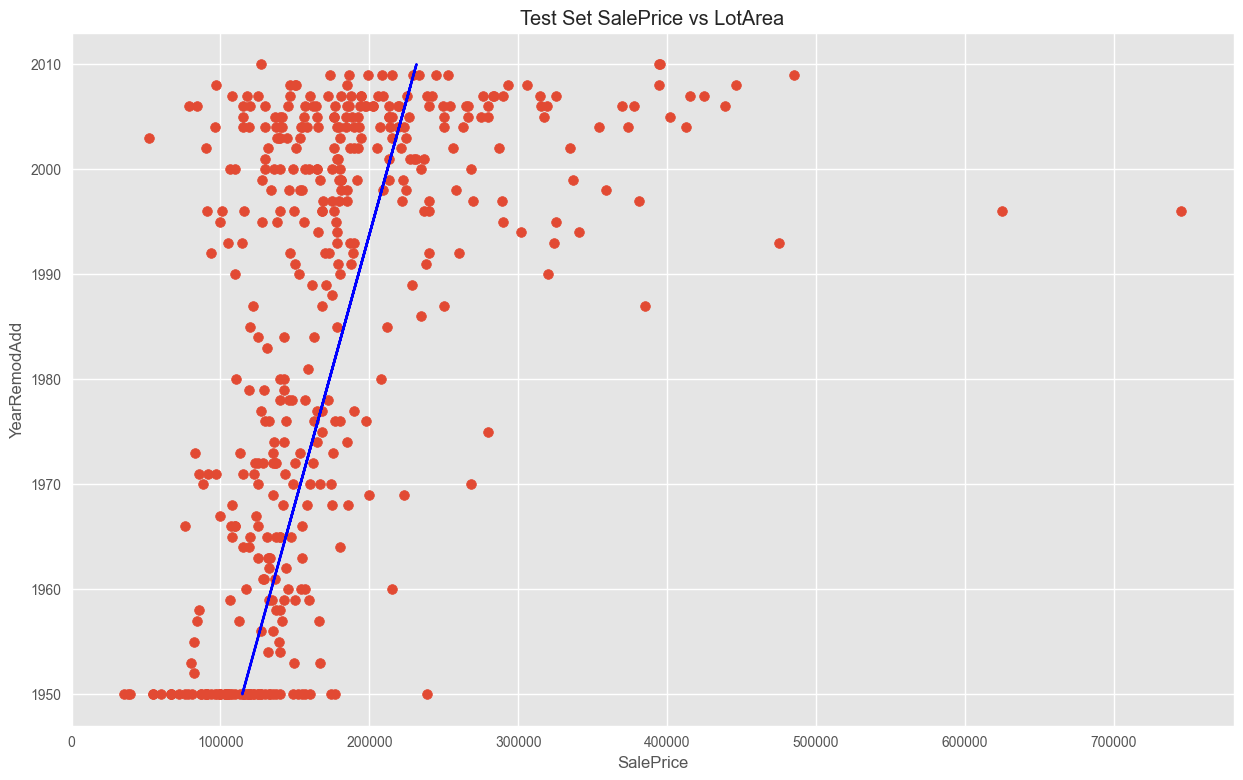

In [97]:
fig = plt.figure()
plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")
plt.xlabel("SalePrice")
plt.ylabel("YearRemodAdd")
plt.title("Test Set SalePrice vs LotArea")

## Lo hacemos con todos por si acaso

Residuales  438
NormaltestResult(statistic=array([255.41269475]), pvalue=array([3.45015043e-56]))
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              5754.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):                        0.00
Time:                        16:23:52   Log-Likelihood:                         -12939.
No. Observations:                1021   AIC:                                  2.588e+04
Df Residuals:                    1020   BIC:                                  2.588e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef 

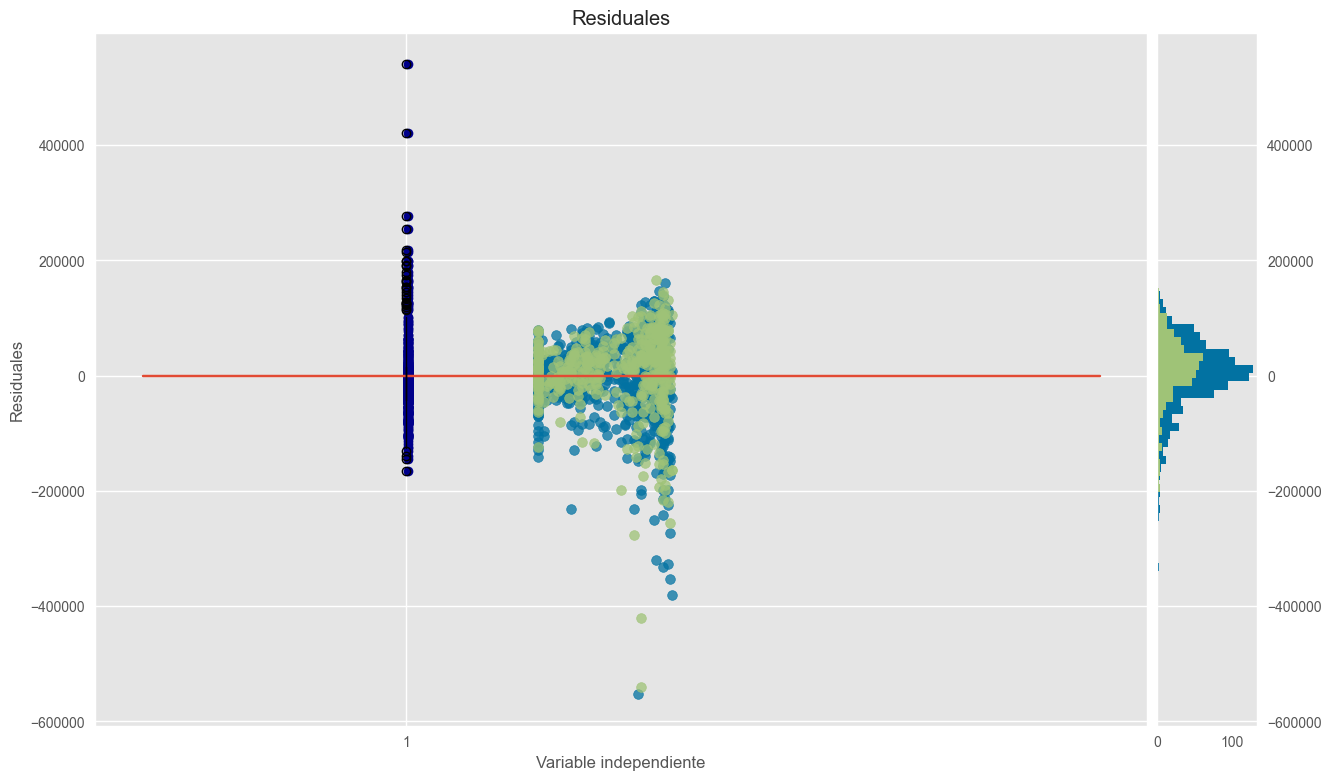

In [98]:

residuales = p_length_t - p_length_pred
print("Residuales ",len(residuales))
plt.plot(p_width_t,residuales, 'o', color='darkblue')
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")
sns.distplot(residuales)
plt.title("Residuales")
plt.boxplot(residuales)
print(normaltest(residuales))
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(p_width,p_length)
visualizer.score(p_width_t,p_length_t)
est = sm.OLS(p_length,p_width)
est2 = est.fit()
print(est2.summary())


In [99]:
print("Mean Squared Error: %.2f"%mean_squared_error(p_length_t,p_length_pred))
print("R squared: %.2f"%r2_score(p_length_t,p_length_pred))

Mean Squared Error: 5095267042.21
R squared: 0.25
